Benjamin Graham, en su libro *'El inversor inteligente'*, describe varios puntos que, según él, distinguen a un inversor inteligente de un inversor especulativo. En esta investigación, nos centraremos en crear un portafolio de inversión para un inversionista defensivo, utilizando las estrategias recomendadas por Graham y con ayuda de algunos elementos del análisis técnico.

Para ello primero vamos a definir algunos puntos:

**Inversor defencivo**

Para Graham, existen dos tipos de inversores inteligentes: los defensivos y los emprendedores. Los primeros no tienen mucha tolerancia al riesgo y no están interesados en generar mayores rendimientos que el promedio; es decir, estos inversionistas buscan una inversión que no los involucre demasiado en el mercado con una ganancia promedio constante. Dado que la relación entre ganancia y riesgo es directamente proporcional, lo que quiere decir que se busca el mejor portafolio con la tasa de riesgo más baja

Graham describe que podemos identificar qué tan defensivo o emprendedor es un inversionista al observar la cantidad que tiene en su portafolio en activos de renta fija y en activos de renta variable. Cuanto mayor sea el porcentaje de activos de renta fija en su portafolio, más defensivo será el inversor. Por lo tanto, armaremos un portafolio con un 75% en renta fija y un 25% en variable.

**¿Por qué estos porcentajes?**

Partiendo de la premisa de que un portafolio 50/50 representa un equilibrio entre un inversionista ni tan defensivo ni tan emprendedor, buscamos el promedio (la mitad) de los inversionistas defensivos, para así buscar representar a la mayoría de estos inversionistas.

**Cápital Inicial**

Partimos de la hipótesis de que un inversionista defensivo representa la mayoría de los agentes económicos denomidados "*familias*". Por lo tanto, debemos crear un presupuesto asequible para estas familias, el cual se armará más adelante.

Es importante mencionar que esta investigación busca proporcionar herramientas a los inversionistas defensivos mexicanos. Por lo tanto, el contexto de los datos se realizará con información recabada de los mercados mexicanos.

**¿Como se va a componer la investigación?**

Esta investigación se compone de *tres* apartados. El primero consiste en una investigación para determinar el capital inicial, el segundo se destina a la obtención del 25% del portafolio, es decir, del capital variable del mismo, y el último se enfoca en buscar los mejores instrumentos de renta fija en el mercado mexicano.

# **Obtención del Capital Inicial.**

Según información de INEGI, en 2022 los ingresos corriente promedio de las familias mexicanas fueron de **$66,485**, como podemos ver en la siguiente tabla:

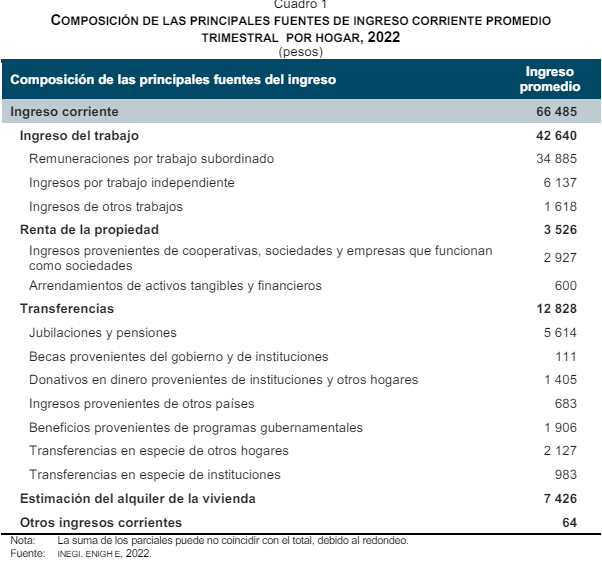

Esta información quiere decir, que las familias en promedio ingresas **66,485**$, a los cuales hay que restarles los costos que las familias tienen, para así conocer en promedio cuanto dinero las familias pueden destinar al ahorro. Dichos gastos los vemos a continuación:

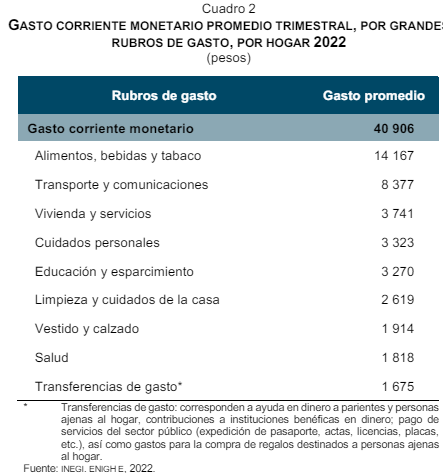

Podemos ver que estos gastos son de **40,906**$

In [2]:
# Una vez ya recabada esta información, creemos las variables donde almacenaremos esta, para su posterior utilización.
gasto_promedio_familias = 40906
ingresos_promedio_familias = 66485

# sacamos el posible ahorro, que las familias pueden tener.
posible_ingreso_ahorro = ingresos_promedio_familias - gasto_promedio_familias
print("Posible ahorro : {}" .format(posible_ingreso_ahorro))

Posible ahorro : 25579


Como podemos ver, el ingreso promedio de las familias, que no se destina al gasto es de **25,579**$ por trimestre, aunque hay que entender dos cosas:



1.   No todas las familias tienen este superavit en sus ingresos, pueden ser menores y hasta en algunos casos hasta nulos.
2.   Aunque las familias alcancen este ingreso disponible despues de sus gastos, no significa que pueden o esten en la facultad para destinar todo este, a la inversión. Partiendo además de que Graham describe que los inversionistas inteligentes deben dominar sus emociones y dejar que su portafolio gnere rendimientos al largo plazo.

Es por ello que debemos ajustar este dato, ademas de calcular su acumulado anual; ya que, vamos a suponer que las familias van a ahorrar por un año para destinar dicho ahorro a su portafolio.

In [3]:
# Obtenemos la mitad de los ingresos.
ingreso_ahorro_trimestre = posible_ingreso_ahorro / 2

# Sacamos el acumulado por un año.
capital_inicial = ingreso_ahorro_trimestre * 4
print("Capital Inicial : {}" .format(capital_inicial))

Capital Inicial : 51158.0


Concluimos que en promedio las familias mexicanas podrían ahorrar un total de **51,158**$ anualmente para destinarlo a la inversión del mercado bursátil.

# **Investigación del 25% del portafolio, acciones de rendimiento variable**

Si estas inversiones suelen ser mas riesgosas, ¿por qué invertir en estas? Por la sencilla razón de que aunque estas inversiones no te garantizan una rentabilidad, si te dan la posibilidad de obtener un rendimiento mucho mayor al de los activos de renta fija, además de que buscamos disminuir el riesgo de estos activos con un gran porcentaje del capital inicial destinado a activos de renta fija, los cuales tienen un riesgo casi nulo.

Por ello se debe hacer una investigación exhaustiva para conocer cuales son las mejores empresas que cotizan en Grupo Bolsa Mexicana de Valores, (GBMV) ya que, esta investigación se centra en México.

Graham menciona que para escoger en que empresas invertir no debemos enfocarnos en sus datos históricos como acción, sino en su *valor subyacente*, ¿A qué se refiere esto Benjamín Graham? Lo que Graham busca es que no veamos a las empresas como acciones ya que, es al revés las empresas no valen por sus acciones las acciones valen por las empresas, es por ello que se debe hacer un análisis exhaustivo de como las empresa operan y como obtienen sus ingresos y como es que el esta, esta situada en su mercado y valorizar el mercado donde se encuentra sujeta. Este punto de la investigación es la mas compleja y larga ya que contamos con 143 empresas que cotizan en GBMV y analizar cada una de ellas y su mercado es una tarea compleja. Por ello he decido apoyarme de un análisis técnico e histórico del valor de las acciones de estas empresas para sacar el top 10 en rendimientos de los últimos 15 años, con el objetivo de analizar simplemente estas 10 empresas.

In [4]:
# Descargamos librerías a utilizar
import numpy as np
import pandas as pd
!pip install yfinance
import yfinance as yf

Actualmente, no existe una fuente de información donde se encuentren los actuales tickets del IPC, (Índice de Precios y Cotizaciones) por eso la forma mas practica de obtener estos tickets, es pidiéndole a una IA, como chat GPT, que te brinde los tickets actuales que conforman el índice.

In [5]:
# Creamos una lista con estos indices
simbolos_ipc = [
  "GMEXICOB.MX",
  "CUERVO.MX",
  "BIMBOA.MX",
  "GRUMAB.MX",
  "KIMBERA.MX",
  "AC.MX",
  "GFNORTEO.MX",
  "BOLSAA.MX",
  "TLEVISACPO.MX",
  "LABB.MX",
  "GCARSOA1.MX",
  "ALSEA.MX",
  "AMXB.MX",
  "PE&OLES.MX",
  "ELEKTRA.MX",
  "LALAB.MX",
  "ALFA.MX",
  "CEMEXCPO.MX",
  "VOLARA.MX",
  "GMXT.MX",
  "UBIK.MX",
  "TRAXIONA.MX",
  "FERMACAB.MX",
  "ASURB.MX",
  "BAL.MX",
  "COPPEL.MX",
  "GSANBORB1.MX",
  "PROFMEXB.MX",
  "TLEVISACPO.MX",
  "GPH1.MX",
  "AVANTE.MX"
]
simbolos_ipc

['GMEXICOB.MX',
 'CUERVO.MX',
 'BIMBOA.MX',
 'GRUMAB.MX',
 'KIMBERA.MX',
 'AC.MX',
 'GFNORTEO.MX',
 'BOLSAA.MX',
 'TLEVISACPO.MX',
 'LABB.MX',
 'GCARSOA1.MX',
 'ALSEA.MX',
 'AMXB.MX',
 'PE&OLES.MX',
 'ELEKTRA.MX',
 'LALAB.MX',
 'ALFA.MX',
 'CEMEXCPO.MX',
 'VOLARA.MX',
 'GMXT.MX',
 'UBIK.MX',
 'TRAXIONA.MX',
 'FERMACAB.MX',
 'ASURB.MX',
 'BAL.MX',
 'COPPEL.MX',
 'GSANBORB1.MX',
 'PROFMEXB.MX',
 'TLEVISACPO.MX',
 'GPH1.MX',
 'AVANTE.MX']

Como podemos ver, se creo una lista con los tickets, para que posteriormente poder crear un DataFrame con los precios de cada acción, de los ultimos 7 año.

In [6]:
# Creamos el DataFrame del Indice
IPC_prices = yf.download(simbolos_ipc, start="2017-06-20")["Adj Close"]
IPC_prices

[*********************100%%**********************]  30 of 30 completed
ERROR:yfinance:
8 Failed downloads:
ERROR:yfinance:['AVANTE.MX', 'BAL.MX', 'COPPEL.MX', 'UBIK.MX', 'FERMACAB.MX', 'LALAB.MX', 'PROFMEXB.MX', 'GSANBORB1.MX']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Ticker           AC.MX    ALFA.MX   ALSEA.MX    AMXB.MX    ASURB.MX  \
Date                                                                  
2017-06-20  105.982712  39.680000  68.010849  13.282517  306.875854   
2017-06-21  105.287895  39.700001  68.292892  13.654389  306.959503   
2017-06-22  107.372337  39.709999  68.565208  13.654389  313.120483   
2017-06-23  107.948730  39.779999  67.816338  14.112078  312.408997   
2017-06-26  107.159149  39.889999  68.390144  14.112078  313.798553   
...                ...        ...        ...        ...         ...   
2024-06-20  181.169998        NaN  59.759998  15.460000  564.475037   
2024-06-21  180.509995        NaN  62.139999  15.310000  565.516663   
2024-06-24  181.149994        NaN  62.900002  15.120000  566.460022   
2024-06-25  180.570007        NaN  62.900002  15.300000  556.000000   
2024-06-26  177.740005        NaN  62.400002  15.490000  547.030029   

Ticker      AVANTE.MX  BAL.MX  BIMBOA.MX  BOLSAA.MX  CEMEXCPO.MX  ...  \
Date                                                              ...   
2017-06-20        NaN     NaN  41.838356  22.829548    16.119570  ...   
2017-06-21        NaN     NaN  42.346035  22.334316    16.256010  ...   
2017-06-22        NaN     NaN  42.210052  22.076235    16.197538  ...   
2017-06-23        NaN     NaN  41.856483  22.278515    16.109825  ...   
2017-06-26        NaN     NaN  41.638912  22.445917    16.022112  ...   
...               ...     ...        ...        ...          ...  ...   
2024-06-20        NaN     NaN  70.540001  31.870001    11.770000  ...   
2024-06-21        NaN     NaN  68.000000  31.500000    11.390000  ...   
2024-06-24        NaN     NaN  65.769997  31.170000    11.450000  ...   
2024-06-25        NaN     NaN  64.720001  30.790001    11.550000  ...   
2024-06-26        NaN     NaN  65.480003  30.660000    11.620000  ...   

Ticker      GSANBORB1.MX  KIMBERA.MX    LABB.MX  LALAB.MX  PE&OLES.MX  \
Date                                                                    
2017-06-20           NaN   27.037115  18.821529       NaN  364.066986   
2017-06-21           NaN   26.727213  18.846212       NaN  360.007629   
2017-06-22           NaN   26.775419  18.953150       NaN  365.332153   
2017-06-23           NaN   26.761644  18.961376       NaN  375.489594   
2017-06-26           NaN   26.851171  18.986052       NaN  379.221222   
...                  ...         ...        ...       ...         ...   
2024-06-20           NaN   31.850000  16.809999       NaN  257.029999   
2024-06-21           NaN   32.189999  16.629999       NaN  239.500000   
2024-06-24           NaN   32.549999  17.110001       NaN  240.119995   
2024-06-25           NaN   32.330002  17.120001       NaN  240.199997   
2024-06-26           NaN   31.980000  16.840000       NaN  239.350006   

Ticker      PROFMEXB.MX  TLEVISACPO.MX  TRAXIONA.MX  UBIK.MX  VOLARA.MX  
Date                                                                     
2017-06-20          NaN      79.667107          NaN      NaN  25.959999  
2017-06-21          NaN      80.126602          NaN      NaN  25.990000  
2017-06-22          NaN      79.970360          NaN      NaN  26.280001  
2017-06-23          NaN      80.788261          NaN      NaN  26.440001  
2017-06-26          NaN      81.891052          NaN      NaN  26.490000  
...                 ...            ...          ...      ...        ...  
2024-06-20          NaN      10.540000    27.100000      NaN  12.070000  
2024-06-21          NaN       9.890000    26.980000      NaN  11.550000  
2024-06-24          NaN      10.050000    26.879999      NaN  11.910000  
2024-06-25          NaN       9.740000    28.200001      NaN  12.050000  
2024-06-26          NaN       9.970000    27.670000      NaN  11.830000  

[1800 rows x 30 columns]

Podemos ver que en el DataFrame hacen falta algunos valores veamos cuales son:

In [7]:
faltantes_por_columna = IPC_prices.isna().sum()
faltantes_por_columna

Ticker
AC.MX              33
ALFA.MX           490
ALSEA.MX           33
AMXB.MX            33
ASURB.MX           33
AVANTE.MX        1800
BAL.MX           1800
BIMBOA.MX          33
BOLSAA.MX          33
CEMEXCPO.MX        33
COPPEL.MX        1800
CUERVO.MX          33
ELEKTRA.MX         33
FERMACAB.MX      1800
GCARSOA1.MX        33
GFNORTEO.MX        33
GMEXICOB.MX        33
GMXT.MX           136
GPH1.MX            34
GRUMAB.MX          33
GSANBORB1.MX     1800
KIMBERA.MX         33
LABB.MX            33
LALAB.MX         1800
PE&OLES.MX         33
PROFMEXB.MX      1800
TLEVISACPO.MX      33
TRAXIONA.MX       106
UBIK.MX          1800
VOLARA.MX          33
dtype: int64

Los visualizamos de forma descendiente para poder identificarlos mejor.

In [8]:
faltantes_ordenados = faltantes_por_columna.sort_values(ascending=False)
faltantes_ordenados

Ticker
LALAB.MX         1800
COPPEL.MX        1800
UBIK.MX          1800
GSANBORB1.MX     1800
AVANTE.MX        1800
BAL.MX           1800
PROFMEXB.MX      1800
FERMACAB.MX      1800
ALFA.MX           490
GMXT.MX           136
TRAXIONA.MX       106
GPH1.MX            34
LABB.MX            33
KIMBERA.MX         33
PE&OLES.MX         33
TLEVISACPO.MX      33
GRUMAB.MX          33
AC.MX              33
GFNORTEO.MX        33
GMEXICOB.MX        33
GCARSOA1.MX        33
ELEKTRA.MX         33
CUERVO.MX          33
CEMEXCPO.MX        33
BOLSAA.MX          33
BIMBOA.MX          33
ASURB.MX           33
AMXB.MX            33
ALSEA.MX           33
VOLARA.MX          33
dtype: int64

Como podemos ver existen 8 tickers que no cuentan con información dentro de nuestro DataFrame. esto se debe a que probablemente el ticket esta mal nombrado o la fuente de información es errónea.

Con respecto a los tickers que tienen valores nulos, esto se debe a que en algunos casos estas compañías no cotizaban hace 7 años o en algunos casos dejaron de cotizar hace no mucho, por ello para tener mas empresas vamos a ajustar los datos que tenemos.

Primero hay que recapitular que:

* Un mes bursátil tiene 30 días.
* Que el ticket **GMXT** que pertenece a la compañía *Grupo México Transportes*, es la que tiene mayor numero de datos nulos, **136 días en total**, es por ello que con respecto a sus datos nulos vamos a reducir el tiempo de nuestra serie temporal.

para ello realizamos la operación:

$$\frac{Nulos}{MesBursátil}$$

Sustituyendo:

$$\frac{136}{30}$$

In [9]:
GMXT_NULOS = 136
MES_BURSÁTIL = 30

Recorte = GMXT_NULOS / MES_BURSÁTIL
print(f"La serie se recortara en {Recorte} meses")

La serie se recortara en 4.533333333333333 meses


In [10]:
# Pasamos los decimales a dias
recorte_dias = 0.53 * 30
print(f"Lo que equivale a {recorte_dias} dias")

Lo que equivale a 15.9 dias


Es decir, que recortamos la serie en 4 meses y 16 dias.

In [11]:
IPC_prices = yf.download(simbolos_ipc, start="2017-11-06")["Adj Close"]
IPC_prices

[*********************100%%**********************]  30 of 30 completed
ERROR:yfinance:
8 Failed downloads:
ERROR:yfinance:['AVANTE.MX', 'BAL.MX', 'COPPEL.MX', 'UBIK.MX', 'FERMACAB.MX', 'PROFMEXB.MX', 'LALAB.MX', 'GSANBORB1.MX']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Ticker           AC.MX    ALFA.MX   ALSEA.MX    AMXB.MX    ASURB.MX  \
Date                                                                  
2017-11-06   97.826546  42.590000  57.497517  16.028650  286.216522   
2017-11-07   98.521362  42.150002  57.439167  16.114468  286.643433   
2017-11-08   98.852974  42.119999  56.233192  16.066792  284.559113   
2017-11-09   97.881828  41.959999  56.875084  15.971440  287.154114   
2017-11-10   97.621262  42.009998  55.357895  15.914229  278.029877   
...                ...        ...        ...        ...         ...   
2024-06-20  181.169998        NaN  59.759998  15.460000  564.475037   
2024-06-21  180.509995        NaN  62.139999  15.310000  565.516663   
2024-06-24  181.149994        NaN  62.900002  15.120000  566.460022   
2024-06-25  180.570007        NaN  62.900002  15.300000  556.000000   
2024-06-26  177.740005        NaN  62.400002  15.490000  547.030029   

Ticker      AVANTE.MX  BAL.MX  BIMBOA.MX  BOLSAA.MX  CEMEXCPO.MX  ...  \
Date                                                              ...   
2017-11-06        NaN     NaN  41.475719  22.676094    14.979310  ...   
2017-11-07        NaN     NaN  41.783955  22.948126    15.125499  ...   
2017-11-08        NaN     NaN  40.777664  22.620295    15.281431  ...   
2017-11-09        NaN     NaN  40.505688  22.571468    15.359398  ...   
2017-11-10        NaN     NaN  39.626316  22.278513    15.144989  ...   
...               ...     ...        ...        ...          ...  ...   
2024-06-20        NaN     NaN  70.540001  31.870001    11.770000  ...   
2024-06-21        NaN     NaN  68.000000  31.500000    11.390000  ...   
2024-06-24        NaN     NaN  65.769997  31.170000    11.450000  ...   
2024-06-25        NaN     NaN  64.720001  30.790001    11.550000  ...   
2024-06-26        NaN     NaN  65.480003  30.660000    11.620000  ...   

Ticker      GSANBORB1.MX  KIMBERA.MX    LABB.MX  LALAB.MX  PE&OLES.MX  \
Date                                                                    
2017-11-06           NaN   23.965645  18.344412       NaN  373.842194   
2017-11-07           NaN   24.057060  18.484259       NaN  372.031006   
2017-11-08           NaN   23.747643  18.262152       NaN  379.558044   
2017-11-09           NaN   23.459330  18.500711       NaN  375.225647   
2017-11-10           NaN   23.438232  18.064722       NaN  365.941925   
...                  ...         ...        ...       ...         ...   
2024-06-20           NaN   31.850000  16.809999       NaN  257.029999   
2024-06-21           NaN   32.189999  16.629999       NaN  239.500000   
2024-06-24           NaN   32.549999  17.110001       NaN  240.119995   
2024-06-25           NaN   32.330002  17.120001       NaN  240.199997   
2024-06-26           NaN   31.980000  16.840000       NaN  239.350006   

Ticker      PROFMEXB.MX  TLEVISACPO.MX  TRAXIONA.MX  UBIK.MX  VOLARA.MX  
Date                                                                     
2017-11-06          NaN      72.636841    16.580000      NaN  19.170000  
2017-11-07          NaN      72.728737    16.570000      NaN  19.170000  
2017-11-08          NaN      72.195724    16.559999      NaN  19.129999  
2017-11-09          NaN      70.890762    16.450001      NaN  18.570000  
2017-11-10          NaN      69.438759    16.389999      NaN  18.500000  
...                 ...            ...          ...      ...        ...  
2024-06-20          NaN      10.540000    27.100000      NaN  12.070000  
2024-06-21          NaN       9.890000    26.980000      NaN  11.550000  
2024-06-24          NaN      10.050000    26.879999      NaN  11.910000  
2024-06-25          NaN       9.740000    28.200001      NaN  12.050000  
2024-06-26          NaN       9.970000    27.670000      NaN  11.830000  

[1701 rows x 30 columns]

Volvemos a visualizar los faltantes, con el nuevo periodo

In [12]:
faltantes_por_columna = IPC_prices.isna().sum()
faltantes_ordenados = faltantes_por_columna.sort_values(ascending=False)
faltantes_ordenados

Ticker
LALAB.MX         1701
COPPEL.MX        1701
UBIK.MX          1701
GSANBORB1.MX     1701
AVANTE.MX        1701
BAL.MX           1701
PROFMEXB.MX      1701
FERMACAB.MX      1701
ALFA.MX           488
GMXT.MX            37
GPH1.MX            33
LABB.MX            32
KIMBERA.MX         32
PE&OLES.MX         32
TLEVISACPO.MX      32
TRAXIONA.MX        32
GRUMAB.MX          32
AC.MX              32
GFNORTEO.MX        32
GMEXICOB.MX        32
GCARSOA1.MX        32
ELEKTRA.MX         32
CUERVO.MX          32
CEMEXCPO.MX        32
BOLSAA.MX          32
BIMBOA.MX          32
ASURB.MX           32
AMXB.MX            32
ALSEA.MX           32
VOLARA.MX          32
dtype: int64

Eliminamos los tickets que no tienen ningún valor.

In [13]:
IPC_prices.drop(["LALAB.MX", "COPPEL.MX", "UBIK.MX", "GSANBORB1.MX", "AVANTE.MX", "BAL.MX", "PROFMEXB.MX", "FERMACAB.MX", "ALFA.MX"], axis= 'columns', inplace=True)

Visualizamos la tabla ya completa

In [14]:
df =IPC_prices.dropna()
df

Ticker           AC.MX   ALSEA.MX    AMXB.MX    ASURB.MX  BIMBOA.MX  \
Date                                                                  
2017-11-10   97.621262  55.357895  15.914229  278.029877  39.626316   
2017-11-13   99.713600  55.601032  15.914229  277.192780  39.816696   
2017-11-14   98.489792  55.406525  15.361188  270.261627  39.871090   
2017-11-15   98.742432  56.194294  15.361188  274.857330  39.671646   
2017-11-16   98.710861  55.571857  15.542356  275.987396  40.215588   
...                ...        ...        ...         ...        ...   
2024-06-19  178.250000  59.810001  15.710000  553.646179  70.290001   
2024-06-20  181.169998  59.759998  15.460000  564.475037  70.540001   
2024-06-21  180.509995  62.139999  15.310000  565.516663  68.000000   
2024-06-24  181.149994  62.900002  15.120000  566.460022  65.769997   
2024-06-25  180.570007  62.900002  15.300000  556.000000  64.720001   

Ticker      BOLSAA.MX  CEMEXCPO.MX  CUERVO.MX   ELEKTRA.MX  GCARSOA1.MX  ...  \
Date                                                                     ...   
2017-11-10  22.278513    15.144989  28.898233   786.913208    57.721073  ...   
2017-11-13  22.194813    14.803885  28.962982   783.474304    58.073029  ...   
2017-11-14  22.062283    14.696682  28.768724   778.291565    56.313244  ...   
2017-11-15  21.873957    14.531004  28.916733   770.386658    55.488926  ...   
2017-11-16  22.020433    14.638208  28.805727   771.500671    56.266937  ...   
...               ...          ...        ...          ...          ...  ...   
2024-06-19  31.629999    11.960000  35.709999  1082.000000   135.899994  ...   
2024-06-20  31.870001    11.770000  35.020000  1077.000000   137.990005  ...   
2024-06-21  31.500000    11.390000  34.599998  1062.099976   133.350006  ...   
2024-06-24  31.170000    11.450000  34.040001  1065.000000   133.300003  ...   
2024-06-25  30.790001    11.550000  33.730000  1070.010010   132.860001  ...   

Ticker      GMEXICOB.MX    GMXT.MX    GPH1.MX   GRUMAB.MX  KIMBERA.MX  \
Date                                                                    
2017-11-10    43.105415  23.655804  48.475357  218.097076   23.438232   
2017-11-13    42.409595  23.655804  48.475357  218.437973   23.614038   
2017-11-14    41.791088  23.655804  48.475357  216.532394   23.480427   
2017-11-15    40.898483  23.588219  48.475357  214.722916   23.389008   
2017-11-16    41.046082  23.625769  48.475357  214.443192   23.107718   
...                 ...        ...        ...         ...         ...   
2024-06-19    95.500000  36.720001  44.000000  338.700012   31.870001   
2024-06-20    99.989998  36.500000  44.000000  342.899994   31.850000   
2024-06-21    96.900002  37.750000  44.000000  331.630005   32.189999   
2024-06-24    96.150002  37.139999  44.000000  334.649994   32.549999   
2024-06-25    94.830002  37.160000  44.000000  331.459991   32.330002   

Ticker        LABB.MX  PE&OLES.MX  TLEVISACPO.MX  TRAXIONA.MX  VOLARA.MX  
Date                                                                      
2017-11-10  18.064722  365.941925      69.438759    16.389999  18.500000  
2017-11-13  18.089403  367.188873      70.348557    16.340000  18.530001  
2017-11-14  18.377316  363.384399      68.804657    16.340000  18.530001  
2017-11-15  18.533615  364.813293      68.372734    16.150000  18.209999  
2017-11-16  18.434904  367.680328      66.994263    16.170000  18.100000  
...               ...         ...            ...          ...        ...  
2024-06-19  17.259998  245.199997       9.980000    27.190001  12.420000  
2024-06-20  16.809999  257.029999      10.540000    27.100000  12.070000  
2024-06-21  16.629999  239.500000       9.890000    26.980000  11.550000  
2024-06-24  17.110001  240.119995      10.050000    26.879999  11.910000  
2024-06-25  17.120001  240.199997       9.740000    28.200001  12.050000  

[1663 rows x 21 columns]

Podemos normalizar cada una de las cotizaciones para poder compararlas entre si

<Axes: xlabel='Date'>

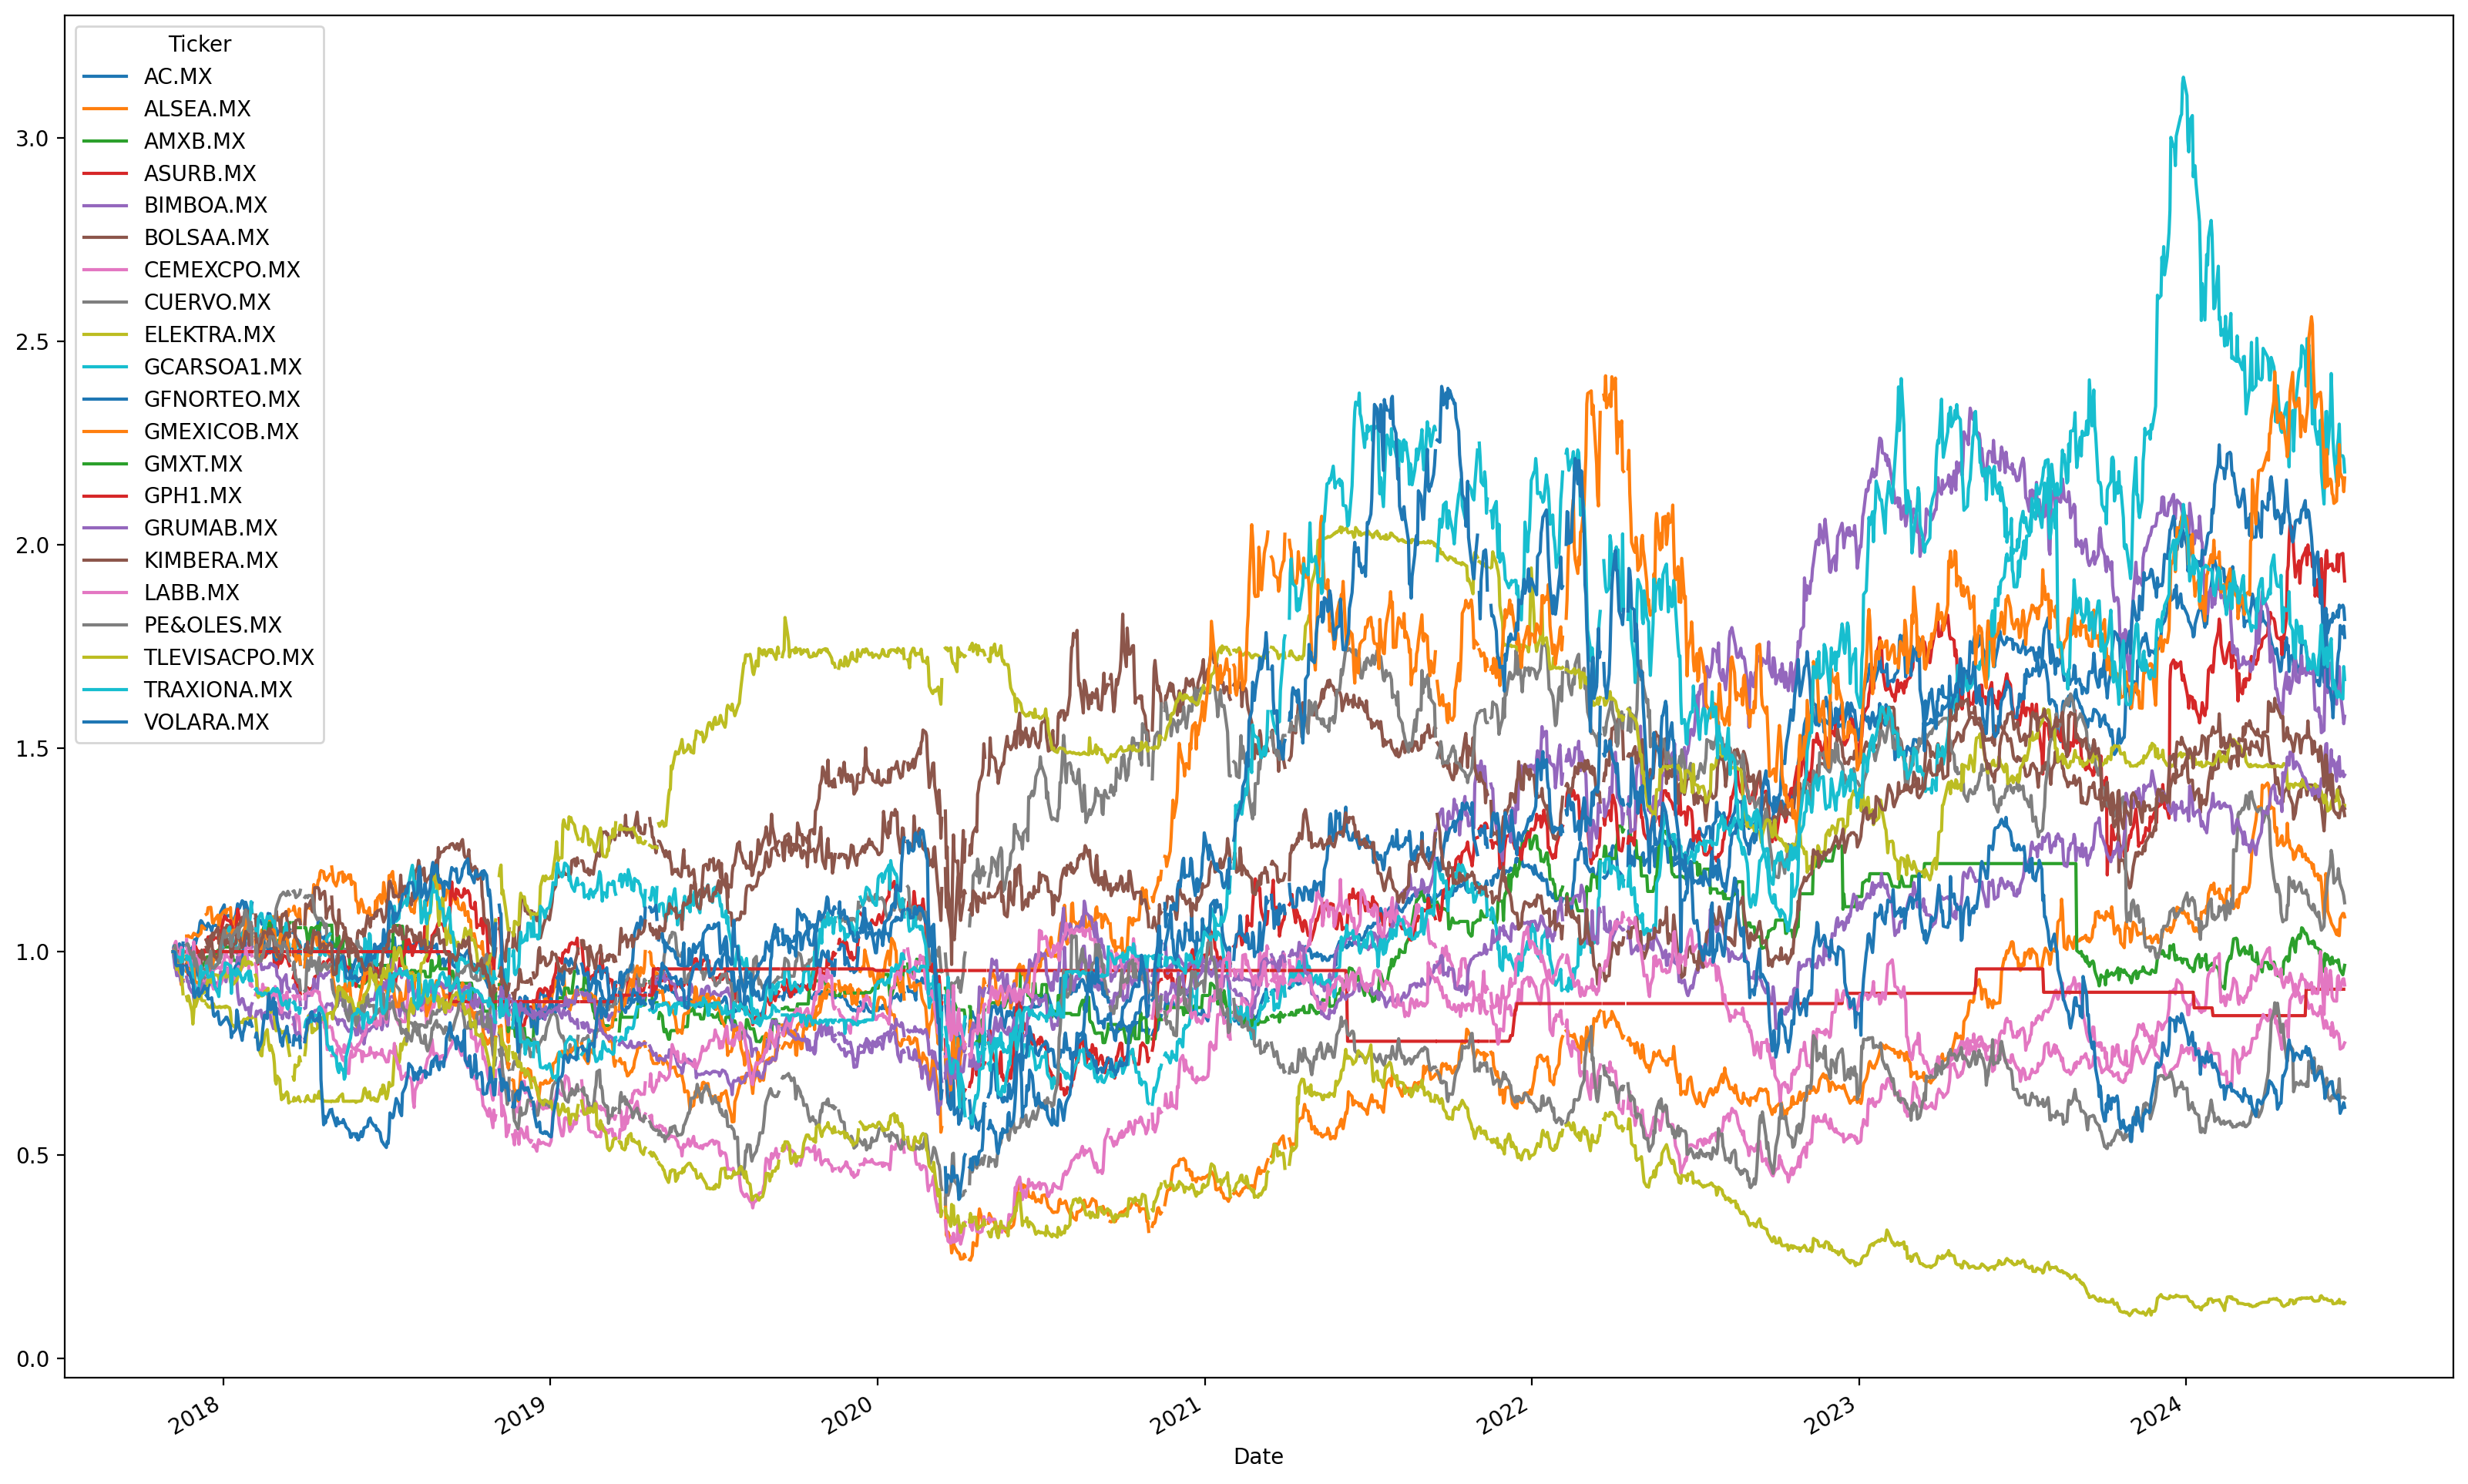

In [15]:
(IPC_prices / IPC_prices.iloc[0]).plot(figsize=(20, 13))

Este es un grafico muy poco visual, con por la saturación de información solicitada, pero podemos deducir algunas cosas.

* Tanto como **Grupo Mexico** y **Grupo Carso** son las doscompañias que tienen mayores rendimientos en este periodo de tiempo.
* Televisa es la compañia mas golpeada, en cuanto a rendimientos.
* Palacio de Hierro se ha mantenido constante en algunos periodos largos de tiempo.

Estas deducciones se van a profundizar mas adelante.

In [16]:
rendimientos_diarios = np.log(df / df.shift(1))
rendimientos_diarios

Ticker         AC.MX  ALSEA.MX   AMXB.MX  ASURB.MX  BIMBOA.MX  BOLSAA.MX  \
Date                                                                       
2017-11-10       NaN       NaN       NaN       NaN        NaN        NaN   
2017-11-13  0.021207  0.004382  0.000000 -0.003015   0.004793  -0.003764   
2017-11-14 -0.012349 -0.003504 -0.035370 -0.025323   0.001365  -0.005989   
2017-11-15  0.002562  0.014118  0.000000  0.016862  -0.005015  -0.008573   
2017-11-16 -0.000320 -0.011138  0.011725  0.004103   0.013618   0.006674   
...              ...       ...       ...       ...        ...        ...   
2024-06-19 -0.008825 -0.012957  0.007027 -0.021666   0.008573  -0.002526   
2024-06-20  0.016249 -0.000836 -0.016041  0.019370   0.003550   0.007559   
2024-06-21 -0.003650  0.039053 -0.009750  0.001844  -0.036672  -0.011678   
2024-06-24  0.003539  0.012156 -0.012488  0.001667  -0.033344  -0.010531   
2024-06-25 -0.003207  0.000000  0.011834 -0.018638  -0.016093  -0.012266   

Ticker      CEMEXCPO.MX  CUERVO.MX  ELEKTRA.MX  GCARSOA1.MX  ...  GMEXICOB.MX  \
Date                                                         ...                
2017-11-10          NaN        NaN         NaN          NaN  ...          NaN   
2017-11-13    -0.022780   0.002238   -0.004380     0.006079  ...    -0.016274   
2017-11-14    -0.007268  -0.006730   -0.006637    -0.030772  ...    -0.014692   
2017-11-15    -0.011337   0.005132   -0.010209    -0.014746  ...    -0.021590   
2017-11-16     0.007351  -0.003846    0.001445     0.013924  ...     0.003602   
...                 ...        ...         ...          ...  ...          ...   
2024-06-19     0.000000   0.020083   -0.016435     0.008350  ...    -0.022263   
2024-06-20    -0.016014  -0.019511   -0.004632     0.015262  ...     0.045944   
2024-06-21    -0.032818  -0.012066   -0.013931    -0.034204  ...    -0.031391   
2024-06-24     0.005254  -0.016317    0.002727    -0.000375  ...    -0.007770   
2024-06-25     0.008696  -0.009149    0.004693    -0.003306  ...    -0.013824   

Ticker       GMXT.MX  GPH1.MX  GRUMAB.MX  KIMBERA.MX   LABB.MX  PE&OLES.MX  \
Date                                                                         
2017-11-10       NaN      NaN        NaN         NaN       NaN         NaN   
2017-11-13  0.000000      0.0   0.001562    0.007473  0.001365    0.003402   
2017-11-14  0.000000      0.0  -0.008762   -0.005674  0.015791   -0.010415   
2017-11-15 -0.002861      0.0  -0.008392   -0.003901  0.008469    0.003924   
2017-11-16  0.001591      0.0  -0.001304   -0.012099 -0.005340    0.007828   
...              ...      ...        ...         ...       ...         ...   
2024-06-19 -0.008947      0.0  -0.003184   -0.007814  0.006320   -0.005409   
2024-06-20 -0.006009      0.0   0.012324   -0.000628 -0.026418    0.047119   
2024-06-21  0.033673      0.0  -0.033419    0.010618 -0.010766   -0.070639   
2024-06-24 -0.016291      0.0   0.009065    0.011122  0.028455    0.002585   
2024-06-25  0.000538      0.0  -0.009578   -0.006782  0.000584    0.000333   

Ticker      TLEVISACPO.MX  TRAXIONA.MX  VOLARA.MX  
Date                                               
2017-11-10            NaN          NaN        NaN  
2017-11-13       0.013017    -0.003055   0.001620  
2017-11-14      -0.022191     0.000000   0.000000  
2017-11-15      -0.006297    -0.011696  -0.017420  
2017-11-16      -0.020367     0.001238  -0.006059  
...                   ...          ...        ...  
2024-06-19      -0.018859     0.009237   0.016234  
2024-06-20       0.054594    -0.003316  -0.028585  
2024-06-21      -0.063653    -0.004438  -0.044038  
2024-06-24       0.016048    -0.003713   0.030693  
2024-06-25      -0.031332     0.047940   0.011686  

[1663 rows x 21 columns]

<Axes: xlabel='Date'>

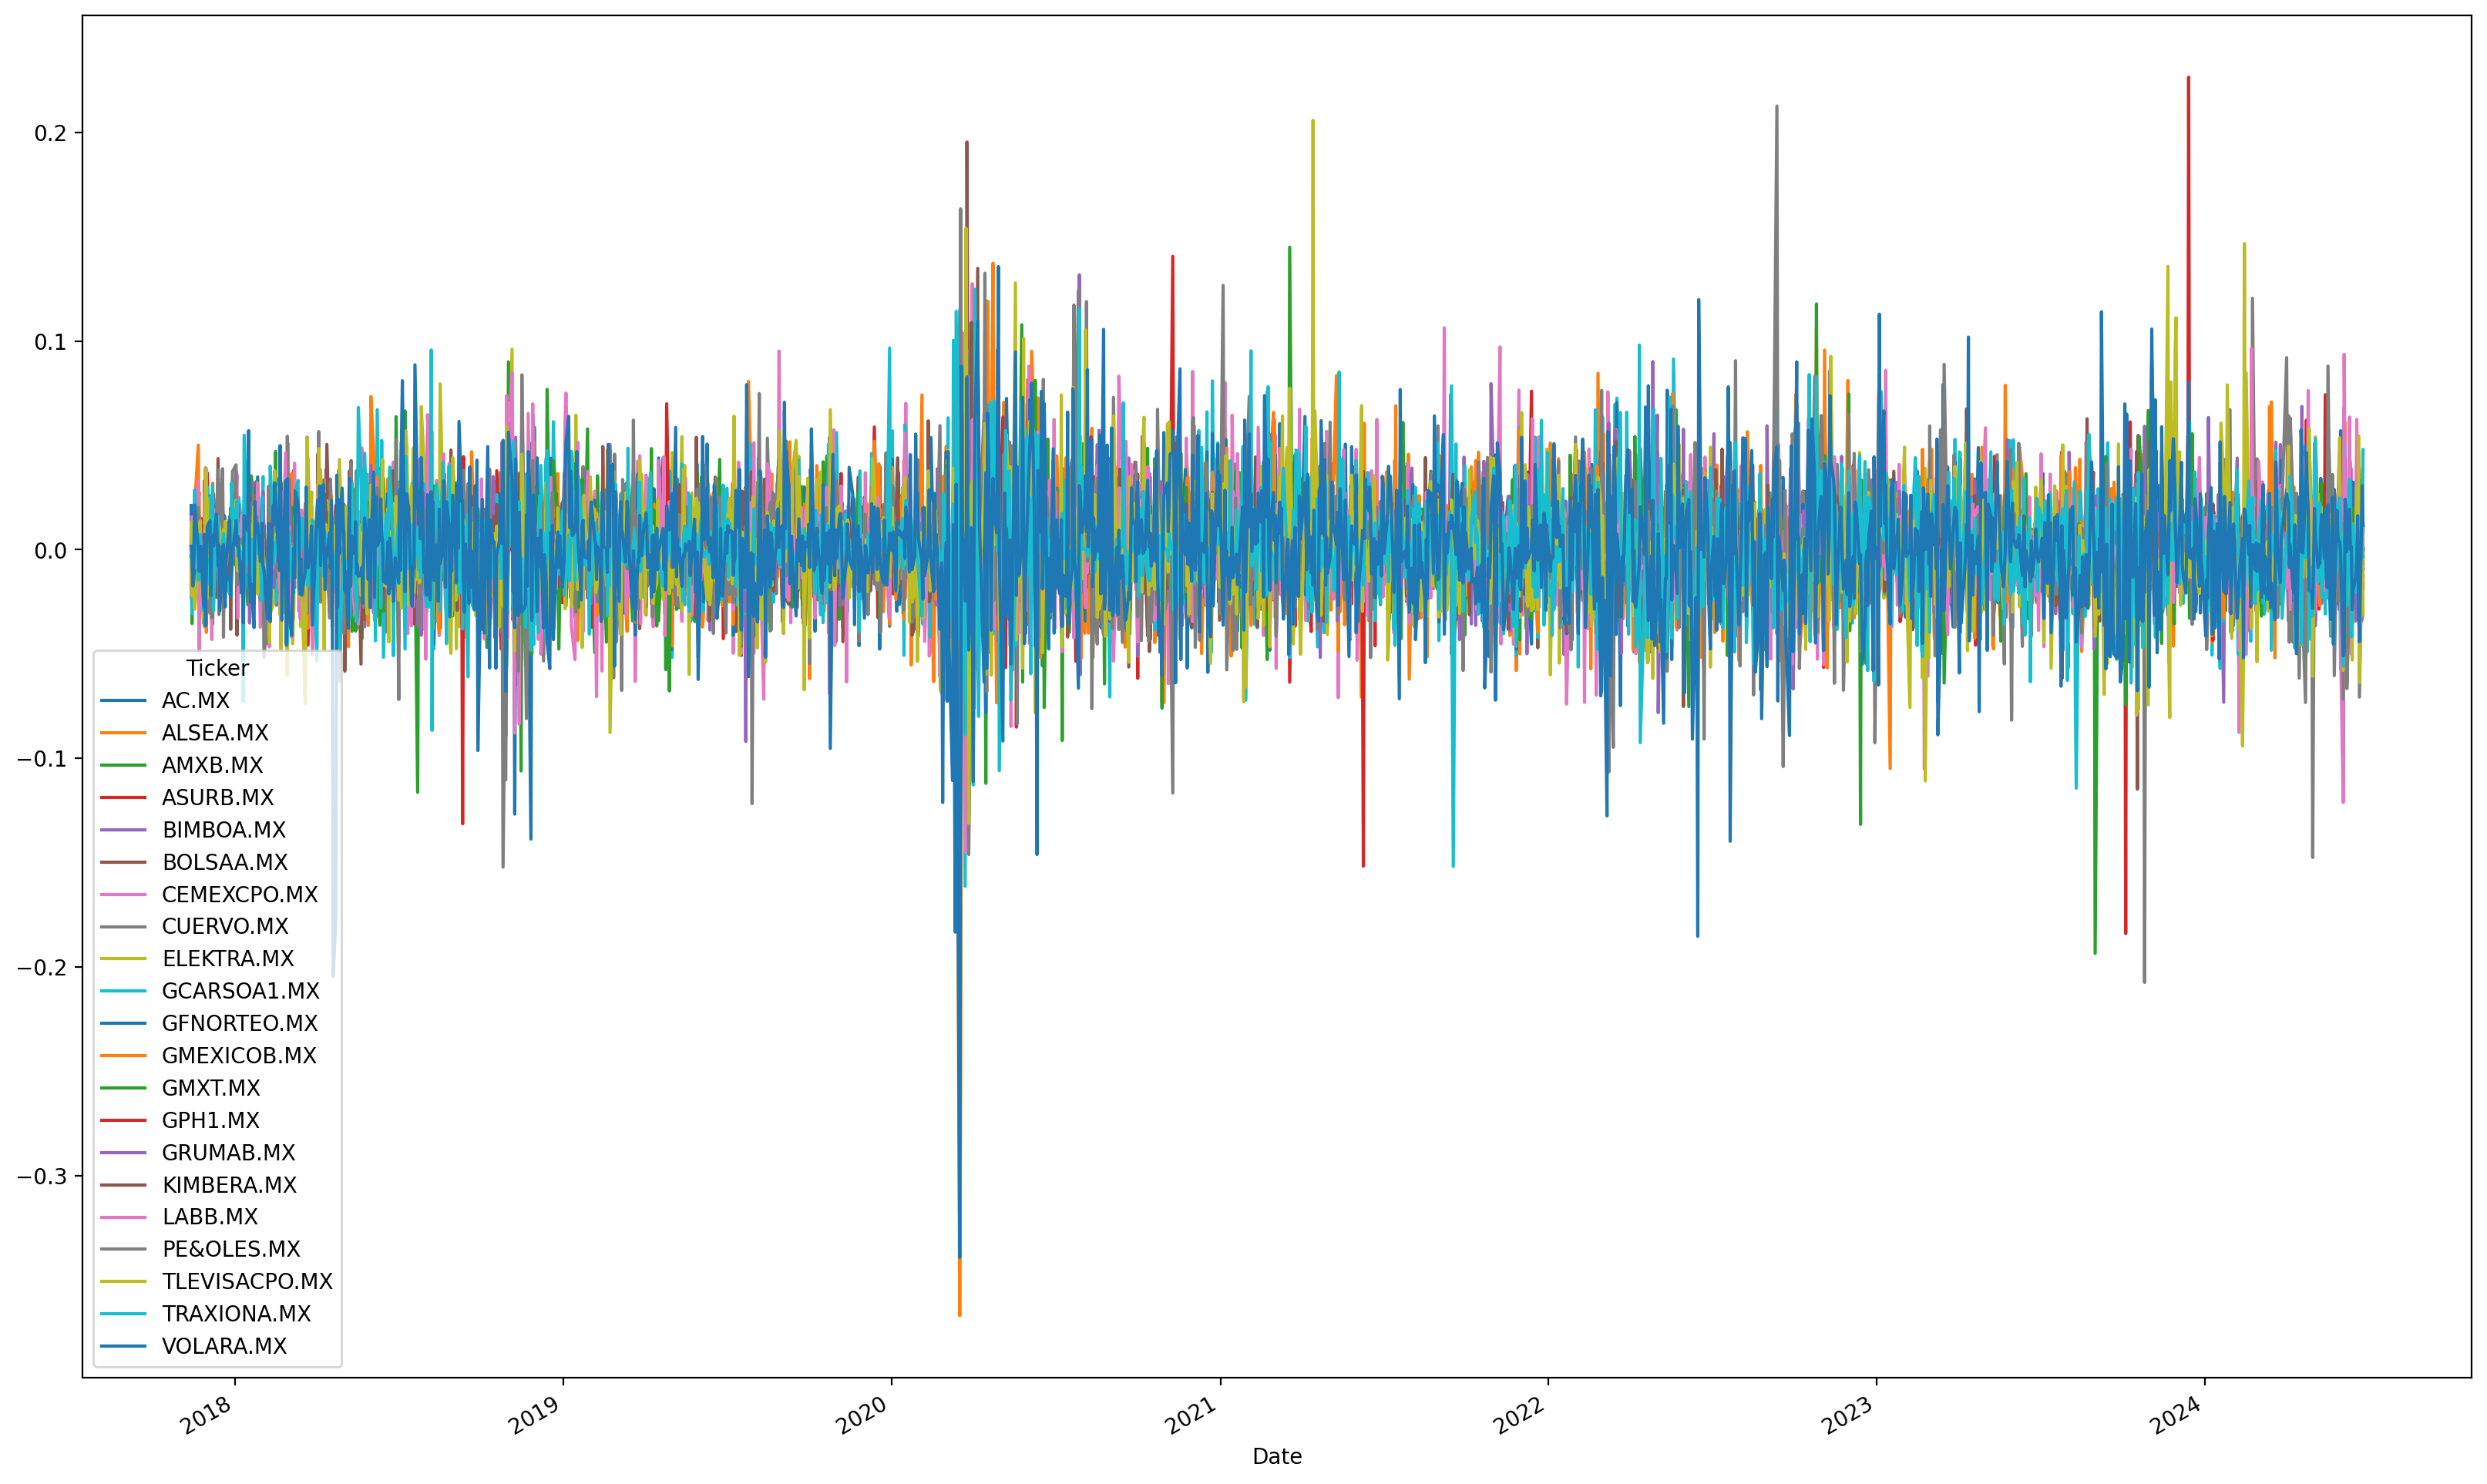

In [17]:
rendimientos_diarios.plot(figsize=(20, 13))

Acá podemos ver que al sacar los rendimientos, la serie se comporta como un ruido blanco, lo que permite aumentar nuestro nivel de análisis.

In [18]:
# Eliminamos los valores nulos de el DataFrame de los rendimientos
rendimientos = rendimientos_diarios.dropna()
rendimientos

Ticker         AC.MX  ALSEA.MX   AMXB.MX  ASURB.MX  BIMBOA.MX  BOLSAA.MX  \
Date                                                                       
2017-11-13  0.021207  0.004382  0.000000 -0.003015   0.004793  -0.003764   
2017-11-14 -0.012349 -0.003504 -0.035370 -0.025323   0.001365  -0.005989   
2017-11-15  0.002562  0.014118  0.000000  0.016862  -0.005015  -0.008573   
2017-11-16 -0.000320 -0.011138  0.011725  0.004103   0.013618   0.006674   
2017-11-17  0.006935  0.021640 -0.002457 -0.011102  -0.015677   0.009144   
...              ...       ...       ...       ...        ...        ...   
2024-06-19 -0.008825 -0.012957  0.007027 -0.021666   0.008573  -0.002526   
2024-06-20  0.016249 -0.000836 -0.016041  0.019370   0.003550   0.007559   
2024-06-21 -0.003650  0.039053 -0.009750  0.001844  -0.036672  -0.011678   
2024-06-24  0.003539  0.012156 -0.012488  0.001667  -0.033344  -0.010531   
2024-06-25 -0.003207  0.000000  0.011834 -0.018638  -0.016093  -0.012266   

Ticker      CEMEXCPO.MX  CUERVO.MX  ELEKTRA.MX  GCARSOA1.MX  ...  GMEXICOB.MX  \
Date                                                         ...                
2017-11-13    -0.022780   0.002238   -0.004380     0.006079  ...    -0.016274   
2017-11-14    -0.007268  -0.006730   -0.006637    -0.030772  ...    -0.014692   
2017-11-15    -0.011337   0.005132   -0.010209    -0.014746  ...    -0.021590   
2017-11-16     0.007351  -0.003846    0.001445     0.013924  ...     0.003602   
2017-11-17    -0.007351   0.008633    0.008614     0.018268  ...     0.008356   
...                 ...        ...         ...          ...  ...          ...   
2024-06-19     0.000000   0.020083   -0.016435     0.008350  ...    -0.022263   
2024-06-20    -0.016014  -0.019511   -0.004632     0.015262  ...     0.045944   
2024-06-21    -0.032818  -0.012066   -0.013931    -0.034204  ...    -0.031391   
2024-06-24     0.005254  -0.016317    0.002727    -0.000375  ...    -0.007770   
2024-06-25     0.008696  -0.009149    0.004693    -0.003306  ...    -0.013824   

Ticker       GMXT.MX  GPH1.MX  GRUMAB.MX  KIMBERA.MX   LABB.MX  PE&OLES.MX  \
Date                                                                         
2017-11-13  0.000000      0.0   0.001562    0.007473  0.001365    0.003402   
2017-11-14  0.000000      0.0  -0.008762   -0.005674  0.015791   -0.010415   
2017-11-15 -0.002861      0.0  -0.008392   -0.003901  0.008469    0.003924   
2017-11-16  0.001591      0.0  -0.001304   -0.012099 -0.005340    0.007828   
2017-11-17 -0.002228      0.0   0.001507    0.002128 -0.008515    0.013572   
...              ...      ...        ...         ...       ...         ...   
2024-06-19 -0.008947      0.0  -0.003184   -0.007814  0.006320   -0.005409   
2024-06-20 -0.006009      0.0   0.012324   -0.000628 -0.026418    0.047119   
2024-06-21  0.033673      0.0  -0.033419    0.010618 -0.010766   -0.070639   
2024-06-24 -0.016291      0.0   0.009065    0.011122  0.028455    0.002585   
2024-06-25  0.000538      0.0  -0.009578   -0.006782  0.000584    0.000333   

Ticker      TLEVISACPO.MX  TRAXIONA.MX  VOLARA.MX  
Date                                               
2017-11-13       0.013017    -0.003055   0.001620  
2017-11-14      -0.022191     0.000000   0.000000  
2017-11-15      -0.006297    -0.011696  -0.017420  
2017-11-16      -0.020367     0.001238  -0.006059  
2017-11-17      -0.028524     0.028652   0.021318  
...                   ...          ...        ...  
2024-06-19      -0.018859     0.009237   0.016234  
2024-06-20       0.054594    -0.003316  -0.028585  
2024-06-21      -0.063653    -0.004438  -0.044038  
2024-06-24       0.016048    -0.003713   0.030693  
2024-06-25      -0.031332     0.047940   0.011686  

[1662 rows x 21 columns]

In [19]:
# Obtenemos los rendimientos medios y anualizados
rendimiento_medio = (rendimientos.mean())*252
print(f"Los rendimientos diarios son : {rendimiento_medio}")

Los rendimientos diarios son : Ticker
AC.MX            0.093253
ALSEA.MX         0.019367
AMXB.MX         -0.005968
ASURB.MX         0.105082
BIMBOA.MX        0.074383
BOLSAA.MX        0.049061
CEMEXCPO.MX     -0.041088
CUERVO.MX        0.023442
ELEKTRA.MX       0.046595
GCARSOA1.MX      0.126405
GFNORTEO.MX      0.092941
GMEXICOB.MX      0.119546
GMXT.MX          0.068477
GPH1.MX         -0.014687
GRUMAB.MX        0.063465
KIMBERA.MX       0.048767
LABB.MX         -0.008144
PE&OLES.MX      -0.063834
TLEVISACPO.MX   -0.297822
TRAXIONA.MX      0.082279
VOLARA.MX       -0.065002
dtype: float64


Una vez ya contando con los rendimientos podemos hacer un gráfico de barras para ver de manera visual, cuales son los activos con mejor rendimiento y como estos son comparados entre ellos.

In [20]:
# Descargamos la libreria para hacer gráficos
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Creamos el Gráfico

<Axes: title={'center': 'Rendimiento de las Compañias Pertenecientes al IPC'}, xlabel='Equity', ylabel='Rendimiento promedio'>

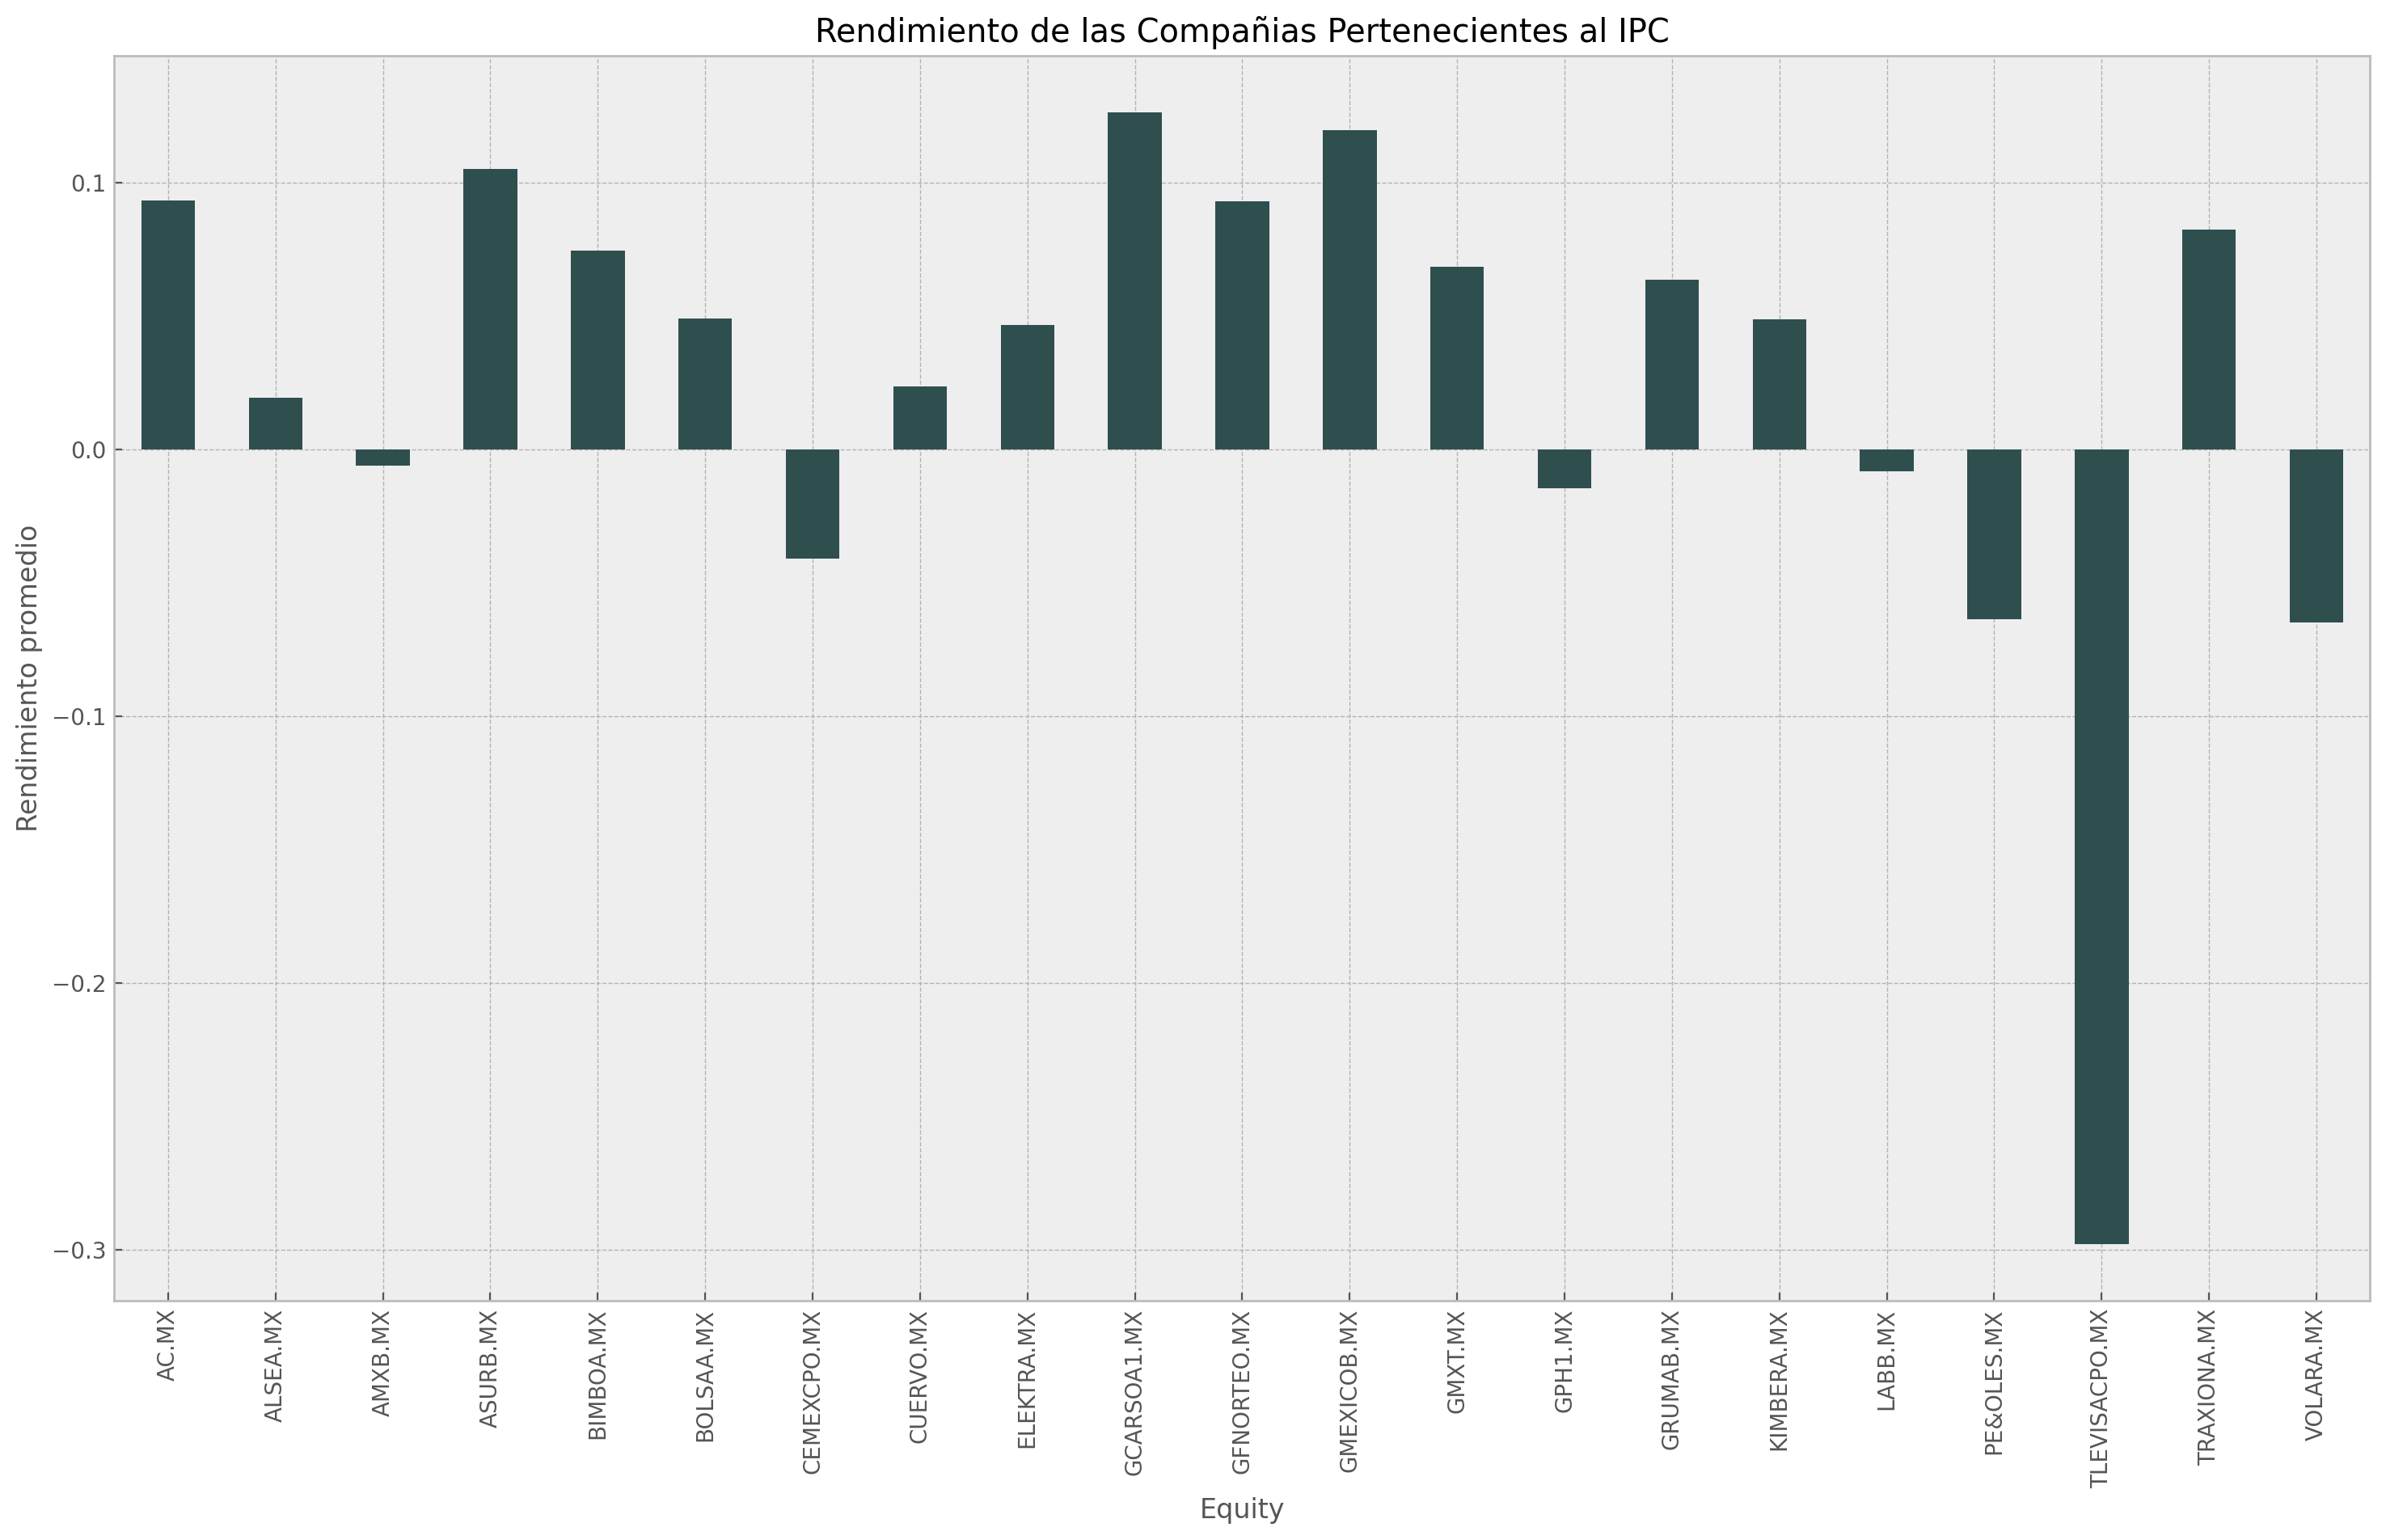

In [21]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
plt.style.use('bmh')

rendimiento_medio.plot(figsize=(18, 10),
                              kind="bar",
                              title="Rendimiento de las Compañias Pertenecientes al IPC",
                              xlabel="Equity",
                              ylabel="Rendimiento promedio",
                              color="darkslategray")

Para organizar las acciones, tenemos que crear una tabla organizada la que después debemos graficar.

Para ello primero...

In [22]:
# Convertimos en una Serie los rendimientos medios.
df2 = pd.DataFrame(rendimiento_medio)
df2

0
Ticker                 
AC.MX          0.093253
ALSEA.MX       0.019367
AMXB.MX       -0.005968
ASURB.MX       0.105082
BIMBOA.MX      0.074383
BOLSAA.MX      0.049061
CEMEXCPO.MX   -0.041088
CUERVO.MX      0.023442
ELEKTRA.MX     0.046595
GCARSOA1.MX    0.126405
GFNORTEO.MX    0.092941
GMEXICOB.MX    0.119546
GMXT.MX        0.068477
GPH1.MX       -0.014687
GRUMAB.MX      0.063465
KIMBERA.MX     0.048767
LABB.MX       -0.008144
PE&OLES.MX    -0.063834
TLEVISACPO.MX -0.297822
TRAXIONA.MX    0.082279
VOLARA.MX     -0.065002

In [23]:
# Sustituimos el nombre de la columna
df2 =  df2.rename(columns={0: "Rendiemiento medios y anualizados"})
df2

Rendiemiento medios y anualizados
Ticker                                          
AC.MX                                   0.093253
ALSEA.MX                                0.019367
AMXB.MX                                -0.005968
ASURB.MX                                0.105082
BIMBOA.MX                               0.074383
BOLSAA.MX                               0.049061
CEMEXCPO.MX                            -0.041088
CUERVO.MX                               0.023442
ELEKTRA.MX                              0.046595
GCARSOA1.MX                             0.126405
GFNORTEO.MX                             0.092941
GMEXICOB.MX                             0.119546
GMXT.MX                                 0.068477
GPH1.MX                                -0.014687
GRUMAB.MX                               0.063465
KIMBERA.MX                              0.048767
LABB.MX                                -0.008144
PE&OLES.MX                             -0.063834
TLEVISACPO.MX                          -0.297822
TRAXIONA.MX                             0.082279
VOLARA.MX                              -0.065002

In [24]:
# Organizamos de mayor a menor, para conocer las mejores 6 compañias del IPC, en cuanto a rendimientos.
df2.sort_values(by="Rendiemiento medios y anualizados", inplace=True, ascending=False)
df2

Rendiemiento medios y anualizados
Ticker                                          
GCARSOA1.MX                             0.126405
GMEXICOB.MX                             0.119546
ASURB.MX                                0.105082
AC.MX                                   0.093253
GFNORTEO.MX                             0.092941
TRAXIONA.MX                             0.082279
BIMBOA.MX                               0.074383
GMXT.MX                                 0.068477
GRUMAB.MX                               0.063465
BOLSAA.MX                               0.049061
KIMBERA.MX                              0.048767
ELEKTRA.MX                              0.046595
CUERVO.MX                               0.023442
ALSEA.MX                                0.019367
AMXB.MX                                -0.005968
LABB.MX                                -0.008144
GPH1.MX                                -0.014687
CEMEXCPO.MX                            -0.041088
PE&OLES.MX                             -0.063834
VOLARA.MX                              -0.065002
TLEVISACPO.MX                          -0.297822

<Axes: title={'center': 'Rendimiento de las Compañias Pertenecientes al IPC'}, xlabel='Equity', ylabel='Rendimiento promedio'>

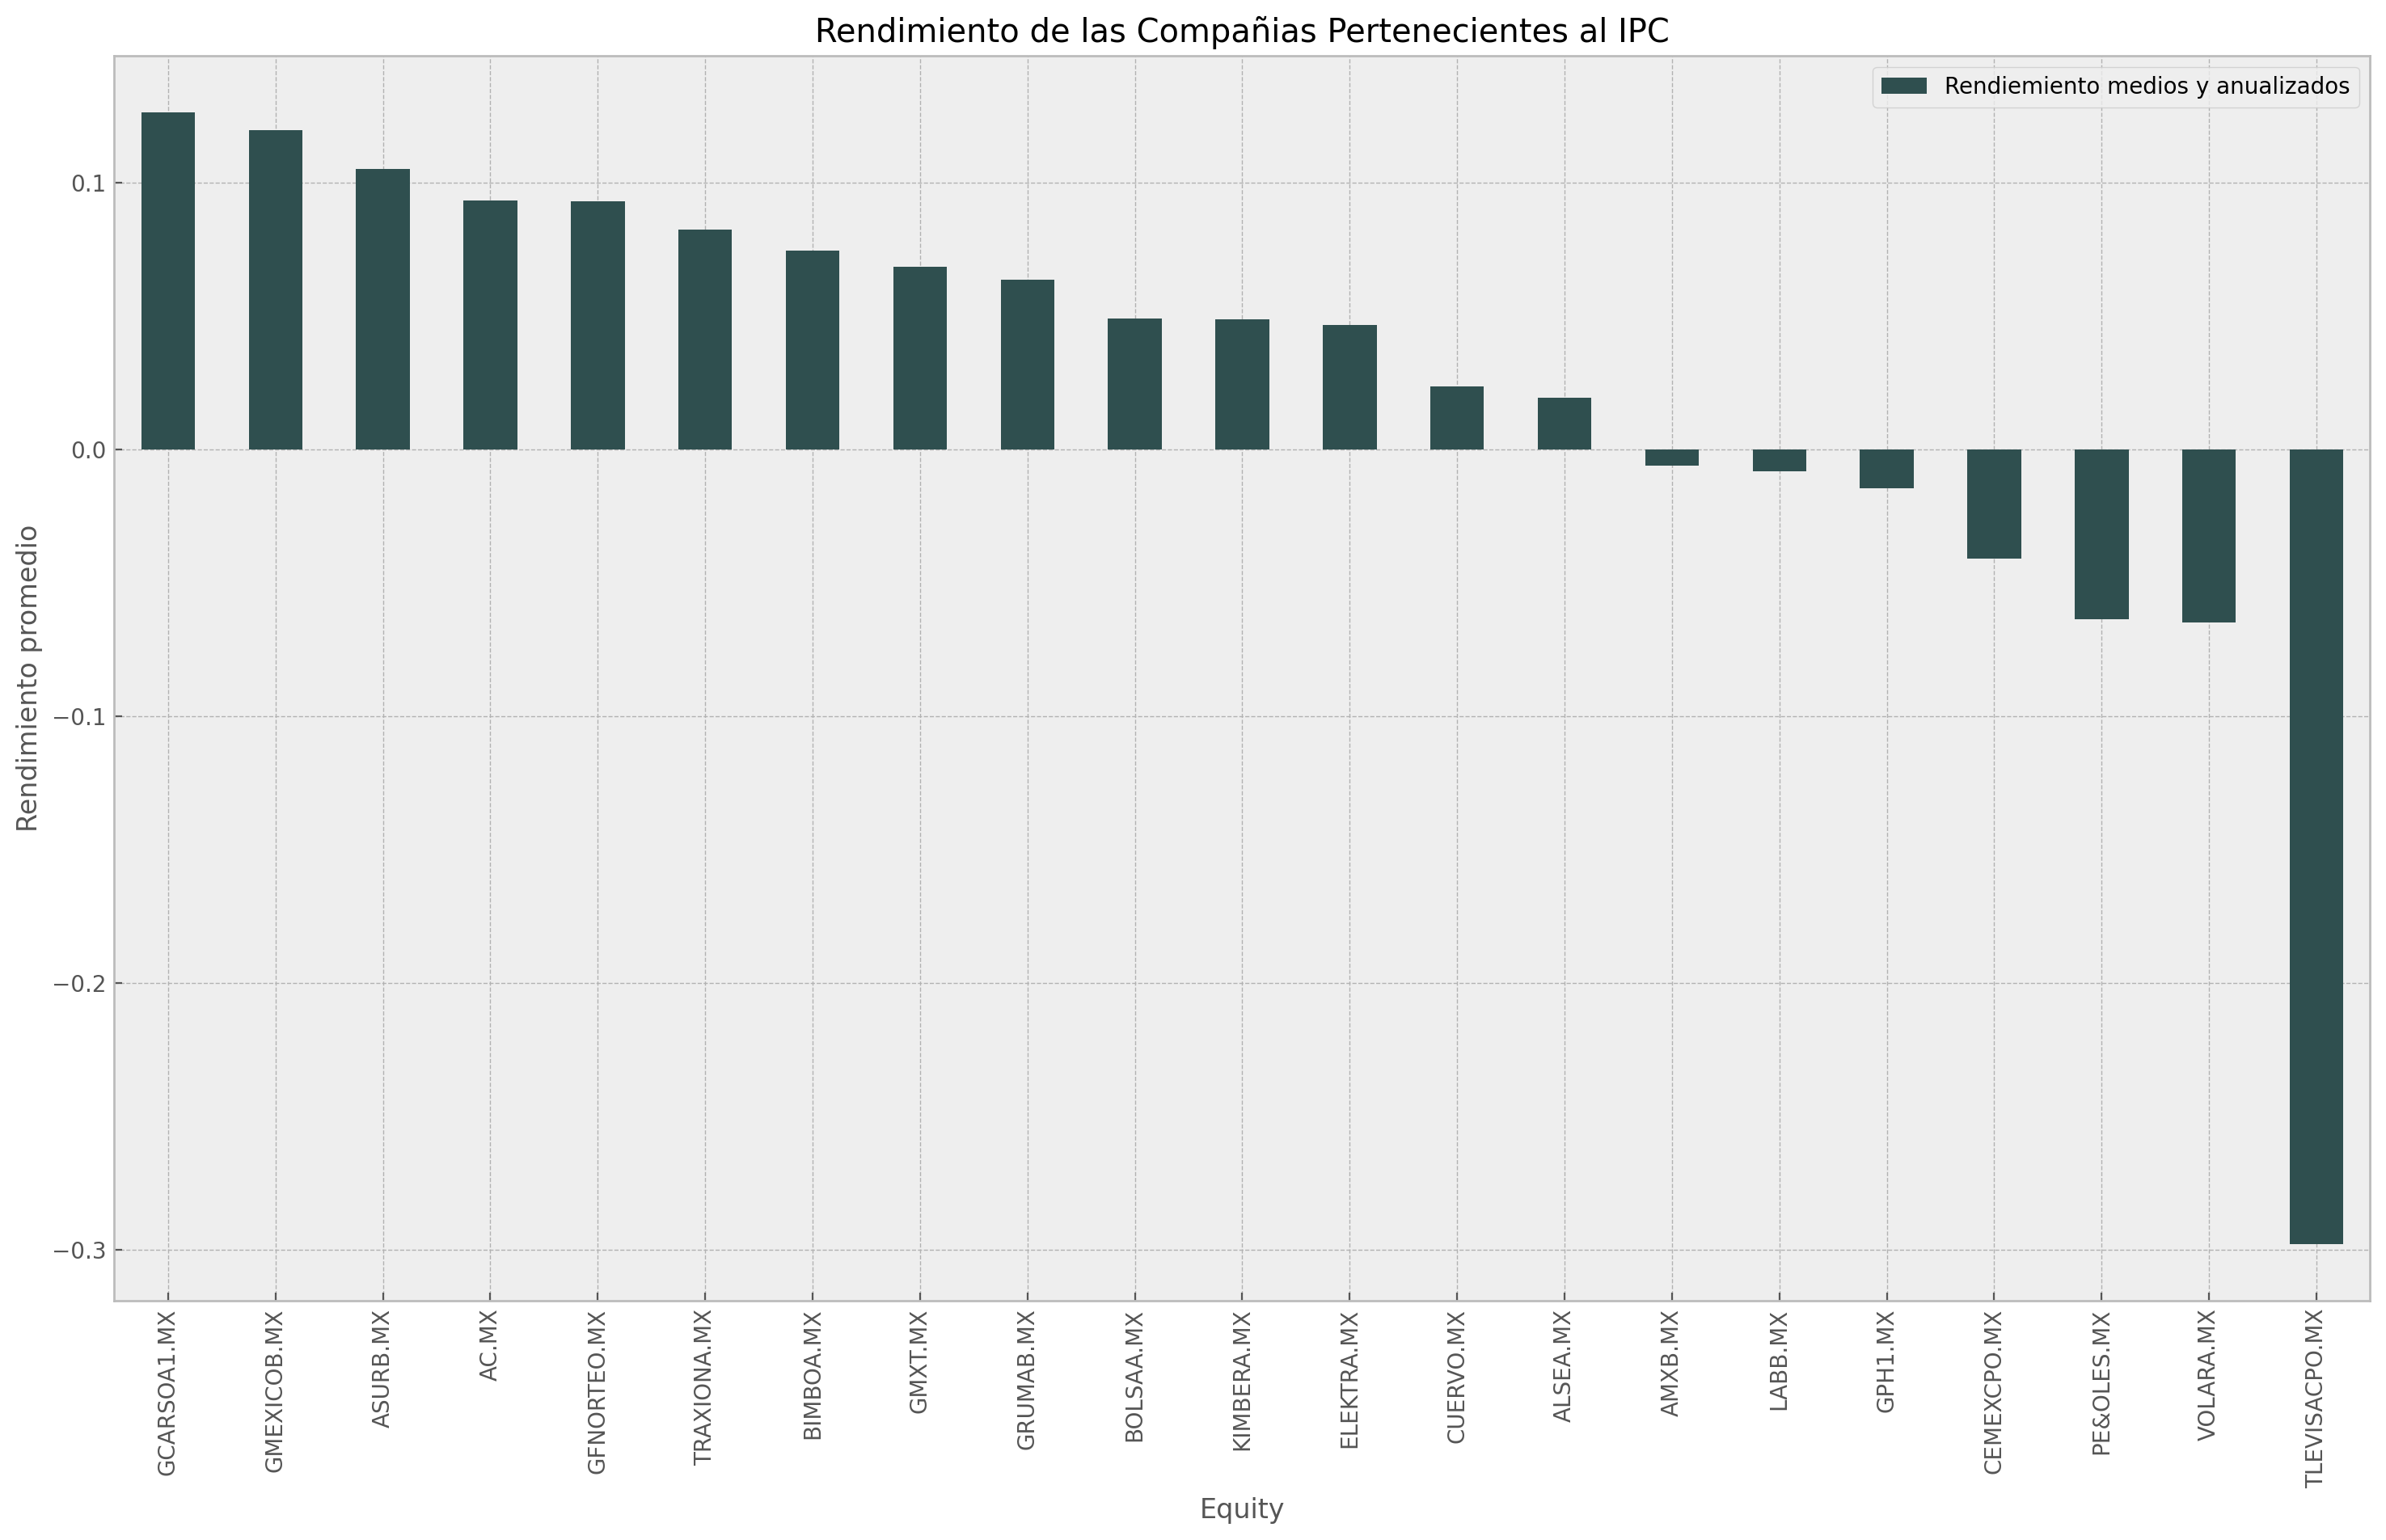

In [25]:
# Gráficamos
%config InlineBackend.figure_format='retina'
%matplotlib inline
plt.style.use('bmh')

df2.plot(figsize=(18, 10),
                              kind="bar",
                              title="Rendimiento de las Compañias Pertenecientes al IPC",
                              xlabel="Equity",
                              ylabel="Rendimiento promedio",
                              color="darkslategray")

A través del gráfico anterior podemos ver que de las 21 compañías que estudiamos del IPC durante estos últimos 7 años, 14 de ellos han dado rendimientos positivos al mercado y 7 rendimientos negativos, siendo estas ultimas:

* Televisa
* Volaris
* Peñoles
* Cemex
* Grupo Palacio de Hierro
* Genomma Lab Internacional
* America Móvil

De aquí podemos hacer el primer análisis "grahamio" ya que podemos visualizar de que industrias pertenecen estas compañías.

* Telecomunicaciones
* Aerolínea
* Mineria
* Construcción
* Retail (venta al por menor)
* Farmacéutica
* Telecomunicaciones (infraestructura)

Respectivamente, de aquí podemos hacer una deducción precipitada, ya que si ha estas acciones en estas industrias no han dado rendimiento alguno, quiere decir que tanto el modelo de negocios como las industrias no tienen el contexto favorecido.

por ejemplo:

* *Televisa* al ubicarse en la rama de los medios de comunicación tradicionales, y con el actual boom de las plataformas de streaming, es predecible y es pronosticable (empíricamente) un contexto mercantil no favorable, es cierto que actualmente, se han incorporado a la industria del streaming, pero este se ha orientado (en su mayoría) a un publico que no suele consumir estos mercados.
* *Volaris*. El problema de volaris no se debe especialmente a su industria, sino a su modelo de negocios y a sus actuales competencias. Volaris compite con las demás aerolíneas mexicanas, por un lado tiene a la aerolínea que para muchos usuarios es la de mejor calidad en este mercado, Aeroméxico, con la cual no puede competir por sus diversos problemas operacionales y en cuanto a precios se encuentra con Viva aerobús, que le gana en este aspecto. Además de la inminente incorporación al mercado de Mexicana de Aviación, el contexto no es favorable para esta compañía.
* *Peñoles* es un ejemplo de ambos factores, (industria y modelo de negocios) ya que es cierto que actualmente la minería en México no se encuentra en su apogeo, pero sus problemas van mas allá ya que han tenido diferentes inconvenientes sociales en cuanto a sus trabajadores y modos de producir.
* *Cemex* enfrenta un problema de encarecimiento de sus insumos, la industria de la construcción suele ser rentable, pero en el contexto actual es mas complicado, por los altos niveles de inflación, lo que ocasiona que los consumidores se centren en otros consumos. En lo personal considero que su panorama no es tan adverso, ya que actualmente han implementado un modelo de negocios orientado a la tecnología que les puede dar mas rentabilidad en el futuro, además de esperar y confiar que estos tiempos complicados van a pasar.
* Grupo Palacio de Hierro, es un caso diferente esta acción se desenlistó de la Bolsa, es cierto que desde antes había tenido un panorama adverso, y que probablemente por esta razón se desenlistó, pero a su vez esta compañía es parte de *Grupo BAL* que desgraciadamente en esta investigación no contamos información sobre su acción, pero de igual manera podemos ver como es que le va a esta acción.
* Genomma Lab, ha tenido diversos problemas operacionales, en cuanto a credibilidad de sus productos, por el cual me atrevo a decir que es el origen de sus bajos rendimientos, ya que la industria farmacéutica a nivel mundial se especula con buenos rendimientos.
* América Móvil, tiene un caso complejo, actualmente son parte del oligopolio del mercado de telecomunicaciones en infraestructura, pero han tenido diversos contratiempos, desde problemas operacionales hasta externalidades que han perjudicado sus operaciones, Considero que América móvil al igual que Cemex a nivel de mercado no esta mal posicionado, pero a diferencia de Cemex América Móvil, no a hecho muchas acciones para mejorar su modelo de negocios.

Ahora, tenemos a las mejores empresas en rendimientos del IPC.

* G. Carso
* G. México
* Grupo Aeroportuario del Sureste
* Arca Continental
* Banorte
* Bimbo

Recordemos que este análisis no es tan relevante para Graham, pero nos sirve para reducir la búsqueda de empresas, ya que se tiene que hacer un análisis a su valor subyacente de la empresa.

Estas empresas van a tener un análisis mas exhaustivo, por lo que no se va a hacer un desglose como con las top loser. Pero si vamos a ver sus industrias.

* Las dos primeras compañías cuentan con diversas compañías en diversas industrias. Esto diversifica su modelo de negocios y por ende diversifica el riego de sus acciones.
* Aeroespacial
* Alimentos
* Banca Comercial
* Alimentos

Creamos un DataFrame con la información del Top 6

In [26]:
Diccionario_top6 = {"Grupo Carso": 0.126983, "Grupo Mexico": 0.107973, "Grupo Aeroportuario del Sureste": 0.107973,
                    "Arca Continental": 0.093795, "Grupo Financiero Banorte": 0.091348, "Bimbo": 0.076870}
pd.DataFrame(Diccionario_top6, index=[0])

Diccionario_top6

{'Grupo Carso': 0.126983,
 'Grupo Mexico': 0.107973,
 'Grupo Aeroportuario del Sureste': 0.107973,
 'Arca Continental': 0.093795,
 'Grupo Financiero Banorte': 0.091348,
 'Bimbo': 0.07687}

In [27]:
# Creamos una tabla del Top 6
Diccionario_top6 = pd.DataFrame(list(Diccionario_top6.items()), columns=['Compañia', 'Rendimiento'])
Diccionario_top6

Compañia  Rendimiento
0                      Grupo Carso     0.126983
1                     Grupo Mexico     0.107973
2  Grupo Aeroportuario del Sureste     0.107973
3                 Arca Continental     0.093795
4         Grupo Financiero Banorte     0.091348
5                            Bimbo     0.076870

Hasta este punto ya hemos discriminado algunas acciones y nos quedamos con las mejores. Aunque como Graham lo menciona en su libro, la creacion del portafolio para los activos de renta variable, no solo debe depender de su análisis técnico en cuanto a "*equity*" sino este debe tener un enfoque mas de modelo de negocio, al final al que le están brindado tus ahorros, no son a una acción sino a una compañía y el valor de la acción depende directamente de la compañía y de su situación económica y como esta se pronostica en el futuro con su modelo de negocios.

La idea es encontrar entre 3 y 6 compañías (para "diversificar el riesgo") que convenzan en cuanto a modelo de negocio, puede ser que ninguna o algunas de estas compañías no convenzan en este aspecto, en este caso podríamos seguir con la siguiente compañía en la lista; es decir, la top 7.

Lo ideal seria estudiar a todo el mercado mexicano de capitales, en busqueda de alguna empresa que en modelo de negocios sea lo suficientemente vistoso para invertir en esta, las razones por la cuales solo hicimos el analisis a nivel IPC son las siguientes.

* La realidad del mercado accionario mexicano, es que es un mercado pequeño, a diferencia del Estadounidense, (que es el estudio de caso de Graham) que existe una concurrencia de entrada de nuevas empresas al mercado de capitales, el caso mexicano, *la Bolsa Mexicana de Valores desde 2017 no se han enlistado mas empresas*. Es por ello que encontrar el *caballo negro* en el mercado mexicano es mas complejo y poco probable, la fuerza del sector bursátil mexicano, a escasez de bursátiliad, es la fiabilidad de sus principales compañías enlistadas, es por ello que se decidió seguir esta línea de análisis.
* En segundo plano, esta es una investigación autónoma, la cual se limita a los tiempos del autor, lo cual no permite realizar una investigación exhaustiva de cada compañía enlistada, además de que al hacerlo de esta manera hacemos mas practica la investigación y brindando prácticamente los mismos beneficios.

Gráficamos el Top 7

<Axes: title={'center': 'Rendimiento del Top 6 del IPC'}, xlabel='Equity', ylabel='Rendimiento promedio'>

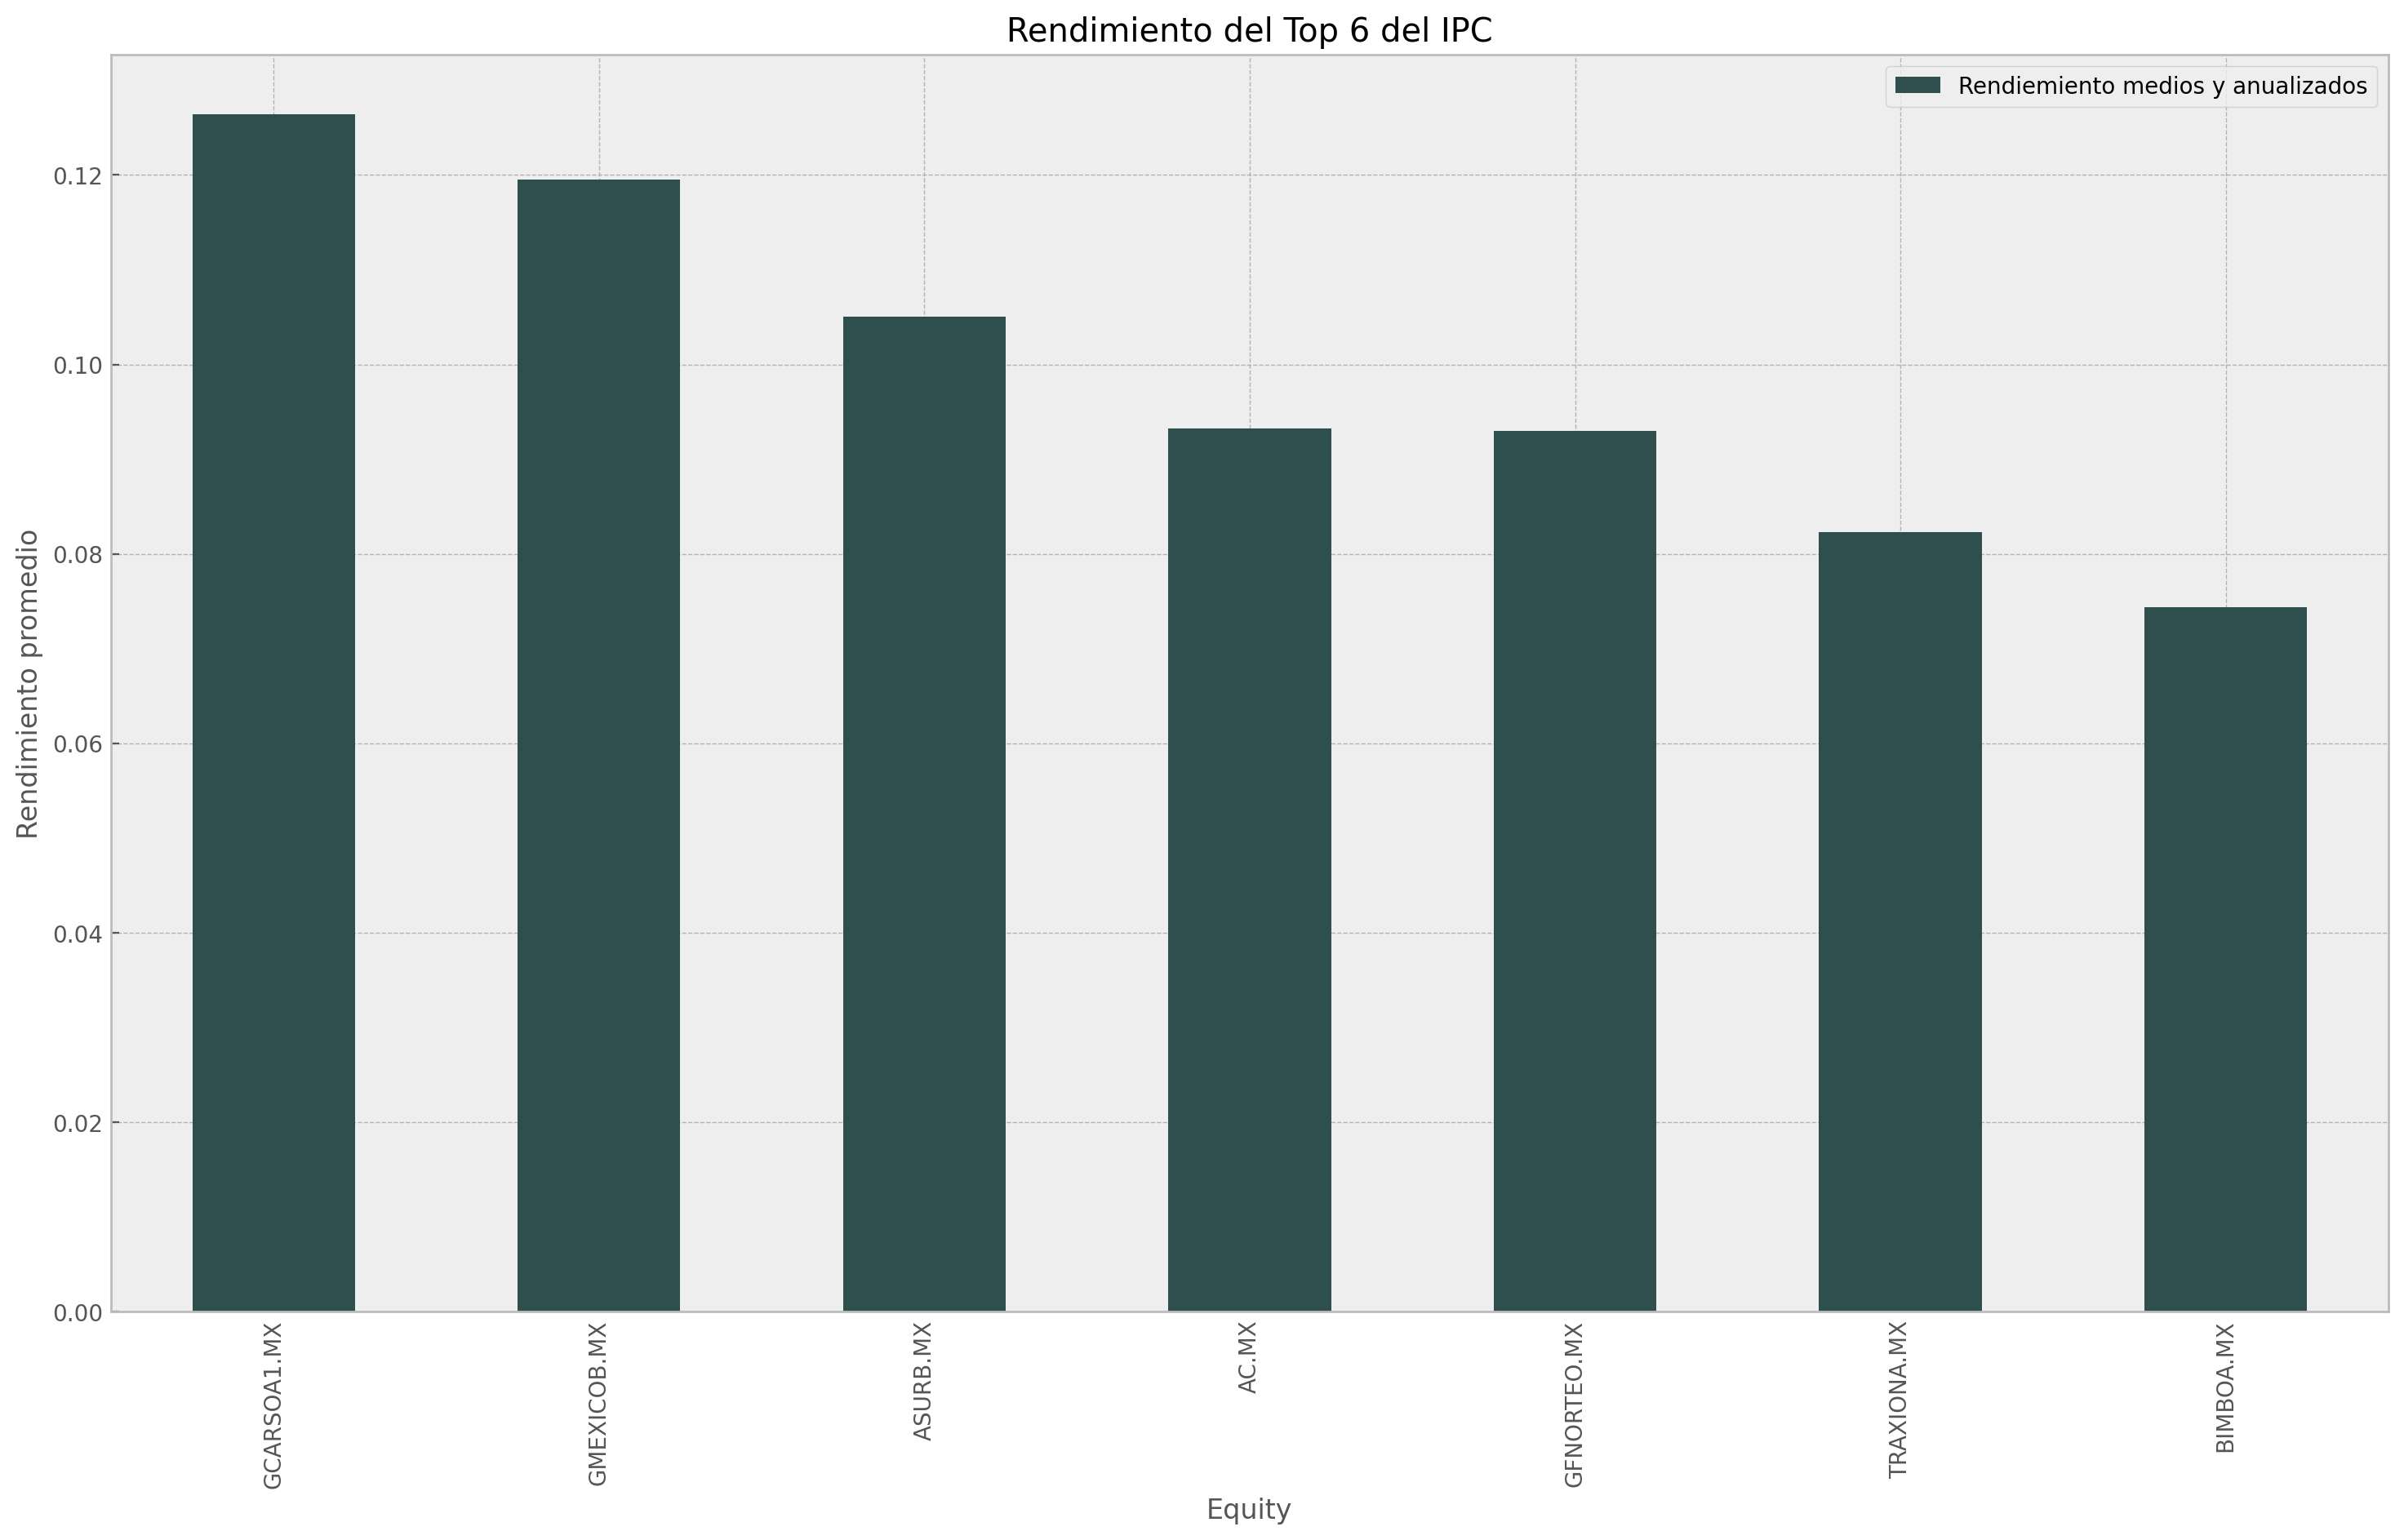

In [28]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
plt.style.use('bmh')
df2_top_7 = df2.head(7)

df2_top_7.plot(figsize=(18, 10),
                              kind="bar",
                              title="Rendimiento del Top 6 del IPC",
                              xlabel="Equity",
                              ylabel="Rendimiento promedio",
                              color="darkslategray")

Creamos un DataFRame con los precios del Top 6

In [29]:
Columnas_top_6 = ["GCARSOA1.MX", "GMEXICOB.MX", "ASURB.MX", "AC.MX", "GFNORTEO.MX", "TRAXIONA.MX", "BIMBOA.MX"]
df_prices_top_6 = df[Columnas_top_6]
df_prices_top_6

Ticker      GCARSOA1.MX  GMEXICOB.MX    ASURB.MX       AC.MX  GFNORTEO.MX  \
Date                                                                        
2017-11-10    57.721073    43.105415  278.029877   97.621262    82.160133   
2017-11-13    58.073029    42.409595  277.192780   99.713600    82.967781   
2017-11-14    56.313244    41.791088  270.261627   98.489792    83.914932   
2017-11-15    55.488926    40.898483  274.857330   98.742432    83.760742   
2017-11-16    56.266937    41.046082  275.987396   98.710861    83.841515   
...                 ...          ...         ...         ...          ...   
2024-06-19   135.899994    95.500000  553.646179  178.250000   146.009995   
2024-06-20   137.990005    99.989998  564.475037  181.169998   146.899994   
2024-06-21   133.350006    96.900002  565.516663  180.509995   151.770004   
2024-06-24   133.300003    96.150002  566.460022  181.149994   150.020004   
2024-06-25   132.860001    94.830002  556.000000  180.570007   151.660004   

Ticker      TRAXIONA.MX  BIMBOA.MX  
Date                                
2017-11-10    16.389999  39.626316  
2017-11-13    16.340000  39.816696  
2017-11-14    16.340000  39.871090  
2017-11-15    16.150000  39.671646  
2017-11-16    16.170000  40.215588  
...                 ...        ...  
2024-06-19    27.190001  70.290001  
2024-06-20    27.100000  70.540001  
2024-06-21    26.980000  68.000000  
2024-06-24    26.879999  65.769997  
2024-06-25    28.200001  64.720001  

[1663 rows x 7 columns]

Lo gráficamos

<Axes: xlabel='Date'>

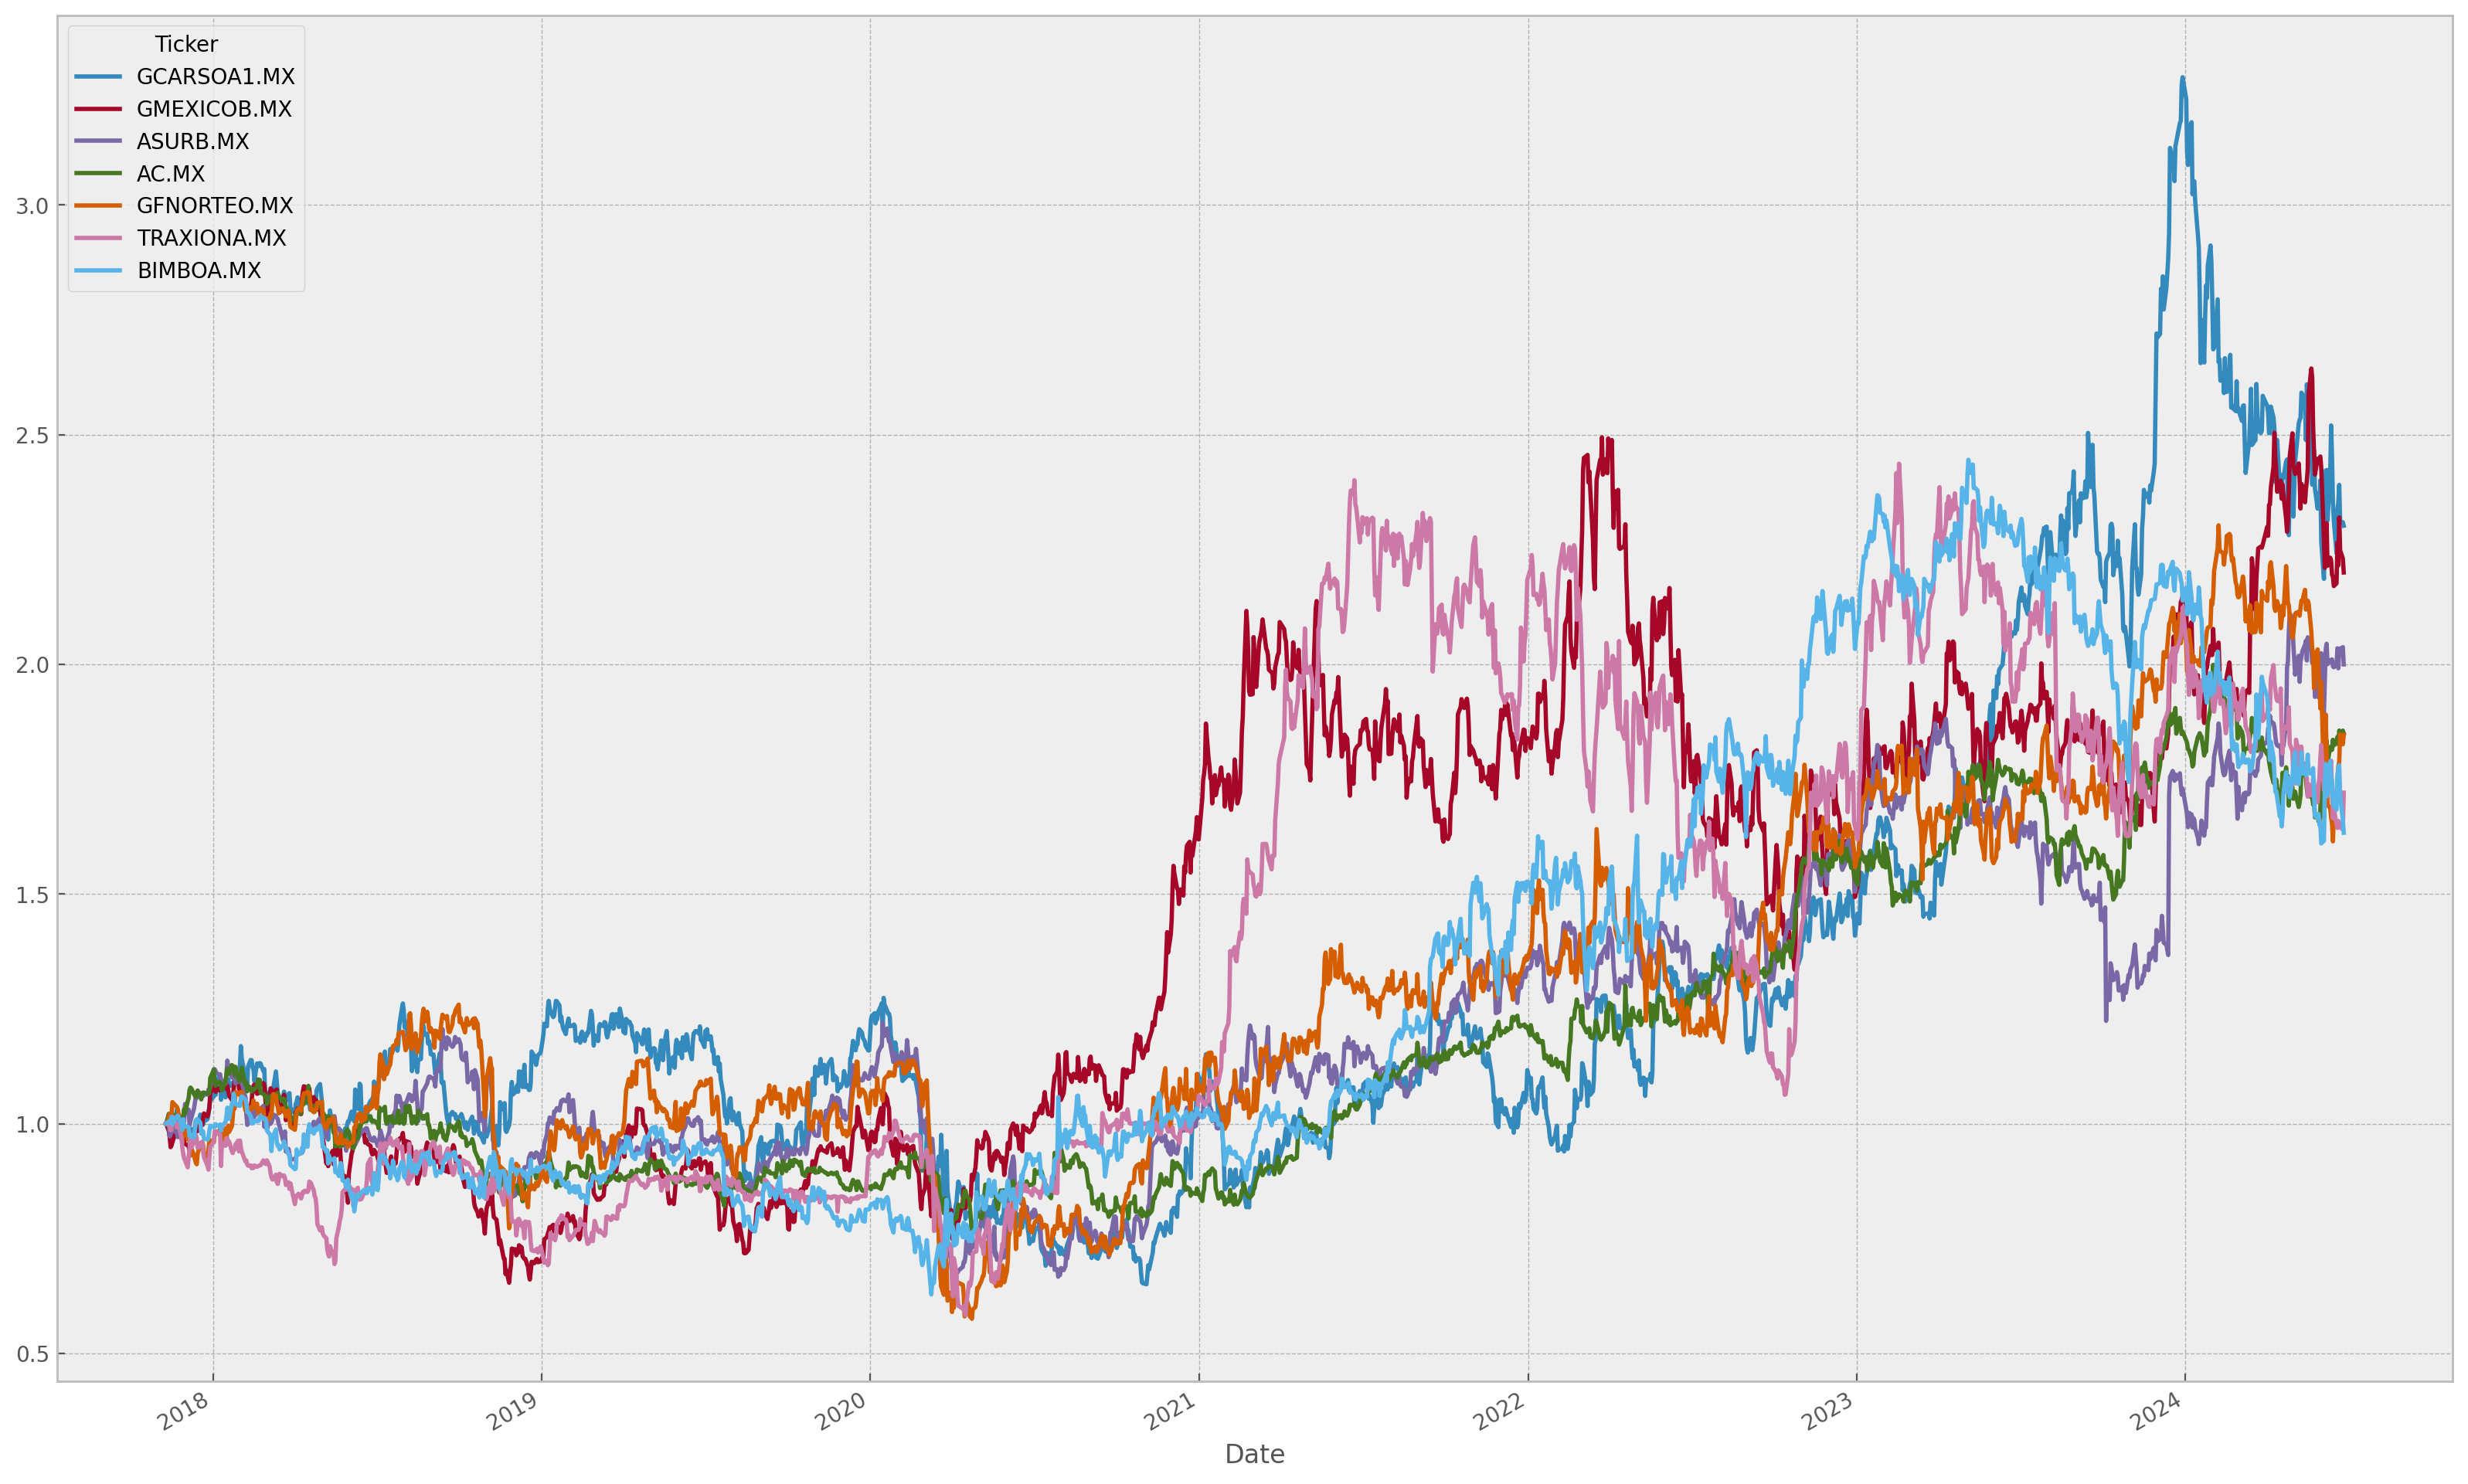

In [30]:
(df_prices_top_6 / df_prices_top_6.iloc[0]).plot(figsize=(20, 13))

A través de este gráfico podemos ver que existen dos tipos de acción que podemos separar en dos bloques segun su volatilidad.

**¿Por qué es importante la volatiliadad?**

Un instrumento muy volatil representa dos cosas un rendimiento extraordinario en un periodo de la serie como tambien una perdida extraordinaria, por ende son activos mas resgiosos, y como dicen cualquier curso de training, entre mayor riesgo mayor ganancia, pero a su ves mayor perdida. recordemos que un inversionista defensivo es intolerante al riesgo, por lo que quiere es tener una inversión mas segura.

En este punto es donde entran las acciones menos volátiles, una acción con crecimiento con poca volatilidad a largo plazo significa un probable rendimiento significativo, en función de su crecimiento. Un comportamiento como este habla muy bien del manejo de la acción aunque este genere rendimientos constantes que extraordinarios (en un tiempo determinado de la serie). En el IPC tenemos tres acciones con estas características principalmente **Arca Continental** que tiene un crecimiento constante y es la cuarta con mayores rendimientos pero a su vez tenemos otras dos que tienen esta tendencia, pero a su vez cuentan con momentos altos de volatilidad a diferencia de **Arca Continental**, estas acciones son: **Grupo Aeroportuario del Sureste** (top 3) y **Banorte** (top 5).

Del lado de las volátiles tenemos dos bloque de igual manera, las que generan mayores rendimientos dentro del top y los que generan menores rendimientos dentro del top.

El primer Bloque esta conformado por **Grupo Carso** (top 1) y **Grupo México** (top 2) y el segundo bloque por **TRAXION** (top 6) y **Bimbo** (top 7). De manera visual podemos descartar estas dos acciones ya que al nivel de riesgo y rendimiento, conviene invertir a ese nivel de riesgo en las dos primeras acciones.